# Understanding Magazine Subscription Behavior: A Data-Driven Analysis
Magazine subscriptions have declined over the past year, challenging the company to understand the underlying causes. This report explores customer behaviors and identifies key factors driving subscription decisions using a comprehensive dataset. By employing data analysis and machine learning techniques, this study aims to:

Identify patterns in customer demographics and purchasing behaviors.

Develop predictive models for subscription behavior.

Highlight actionable insights for targeted marketing campaigns.

The findings will empower the company to re-engage customers effectively and reverse declining subscription trends.


# Body/Analysis

1.Data Preparation:

To ensure robust analysis, the dataset will undergo rigorous cleaning and preprocessing. This includes:

Handling Missing Data: Imputation for missing values in critical features such as income.
    
Outlier Treatment: Identifying and capping outliers in features like spending and income using statistical methods like the IQR.
    
Feature Engineering: Creating new features such as Customer_Age, Total_Spending, and Family_Size to provide additional insights.

Encoding and Scaling: Encoding categorical variables (e.g., education levels) and scaling numerical features for compatibility with machine learning models.

Balancing the Dataset: Oversampling the minority class (customers who subscribed) to address class imbalance, ensuring fair model training.

2.Exploratory Data Analysis (EDA):

EDA will help uncover trends and correlations in the data, with a focus on:

Demographics: Examining how features like age, marital status, and education influence subscription behavior.
    
Spending Patterns: Analyzing customer spending across categories (e.g., wines, fruits) to understand purchasing behaviors.
    
Campaign Effectiveness: Assessing acceptance rates across different marketing campaigns.
    
Behavioral Trends: Investigating recency (last purchase date) and web visits to gauge customer engagement
    .
Visualizations, including histograms, bar plots, and heatmaps, will present these findings clearly and concisely.

3.Predictive Model Development:

Three machine learning models will be developed to predict subscription behavior:

Logistic Regression: A baseline model focusing on interpretability and identifying significant predictors of subscription likelihood. It will provide insights into variables that drive customer responses.

Support Vector Machine (SVM): A non-linear model capturing complex relationships in the data. Hyperparameter tuning (e.g., kernel selection, regularization) will optimize its performance.

Decision Tree: An interpretable model illustrating decision-making pathways with clear, actionable rules. The depth will be limited to four branches to maintain simplicity.

4.Model Evaluation and Comparison:

Each model will be evaluated on its ability to predict subscriptions accurately and fairly. Metrics for comparison include:

Accuracy: Overall correctness of predictions.
    
Precision: Ability to correctly identify customers likely to subscribe.
    
Recall: Sensitivity in capturing all potential subscribers.
    
F1 Score: A balanced metric combining precision and recall.
    
ROC-AUC: A measure of the model’s ability to distinguish between customers who subscribed and those who didn’t.
Confusion matrices and ROC curves will further validate model performance. The strengths and weaknesses of each model will be highlighted.

5.Insights and Recommendations:

Using feature importance analysis and model performance results, we will:

Identify customer groups with the highest subscription potential (e.g., by demographics or spending habits).

Suggest strategies to increase engagement, such as targeted campaigns for high-spending, recently-engaged customers.

Highlight the most influential variables for driving subscriptions, aiding in resource allocation for marketing efforts.

Conclusion

This study will identify the most effective predictive model for understanding customer subscription behavior and provide actionable business recommendations. By focusing on the identified key drivers, the company can optimize its marketing strategies, enhance customer engagement, and ultimately reverse the declining subscription trend.

# 1.1 Importing Necessary Libraries
We imported the essential Python libraries needed for data analysis, visualization, and model building, such as pandas, numpy, matplotlib, seaborn, and scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from IPython.display import display, HTML
from sklearn.tree import plot_tree  

# 1.2 Loading the Dataset
Load the census dataset and inspect its structure to ensure that all columns and data types are appropriately read.

In [2]:
MKTG_campaign = pd.read_excel(r"C:\Users\Amit\Downloads\marketing_campaign-1-1.xlsx")  # Update with your file path

# 1.3 Displaying the First Few Rows of the Dataset
We display the first few rows of the dataset to get a quick overview of the data structure, column names, and initial values.

In [3]:
print("\nHead of the dataset:")
(MKTG_campaign.head())


Head of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


   *Table 1* : *This table displays the first five rows of the dataset, including customer demographics, spending behavior, and campaign responses.*


# 1.4 Getting Dataset Information¶
We use the info() method to show a summary of the dataset, including the number of entries, columns, data types, and non-null counts. This helps in understanding the overall structure of the data.

In [4]:
print("\nDataset information:")
(MKTG_campaign.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchase

In [5]:
num_duplicates = MKTG_campaign.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


# 1.9 Checking Data Types
We looked at the data types of all columns to make sure everything is formatted correctly for analysis. This step helps catch any issues, like numbers stored as text or binary data not recognized properly. The current data types were printed to check if any adjustments are needed.


In [6]:
print("\nData types before conversion:\n")
MKTG_campaign.dtypes


Data types before conversion:



ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# 1.10 Converting Data Types
To ensure consistency and compatibility for analysis, the columns Education and Marital_status were converted to the category data type. After the conversion, the updated data types were verified to confirm the changes.

In [7]:
# Converting object columns to category
MKTG_campaign['Education'] = MKTG_campaign['Education'].astype('category')
MKTG_campaign['Marital_Status'] = MKTG_campaign['Marital_Status'].astype('category')

# Printing data types of columns to verify conversion
print(MKTG_campaign[['Education', 'Marital_Status']].dtypes)

Education         category
Marital_Status    category
dtype: object


# 1.11 Creating Customer Tenure Feature
We transformed the Dt_Customer column into a datetime format to ensure accurate calculations and created a new feature, Days_Since_Customer, representing the number of days since each customer's enrollment. This metric helps quantify customer tenure, which can reveal insights into loyalty and subscription behavior. The original Dt_Customer column was dropped as it was no longer needed for analysis.

In [8]:
# Converting 'Dt_Customer' to datetime
MKTG_campaign['Dt_Customer'] = pd.to_datetime(MKTG_campaign['Dt_Customer'], errors='coerce')

# Calculating days since the earliest customer date
min_date = MKTG_campaign['Dt_Customer'].min()
MKTG_campaign['Days_Since_Customer'] = (MKTG_campaign['Dt_Customer'] - min_date).dt.days

# Dropping the original 'Dt_Customer' column (optional if not needed)
MKTG_campaign = MKTG_campaign.drop(columns=['Dt_Customer'])

# Displaying the first 5 rows of the new 'Days_Since_Customer' feature
(MKTG_campaign[['Days_Since_Customer']].head())

,Days_Since_Customer
0,36
1,586
2,387
3,560
4,538


*Table 2*  : *This table shows the number of days since each customer enrolled with the company, representing their tenure as a customer.*


# Exploratory Data Analysis (EDA)

# 1.12 Analyzing the Distribution of the Target Variable
We plotted the distribution of the target variable Response to understand the proportion of customers who responded positively (1) or negatively (0) to the campaign. A bar chart was used, with clear labels and distinct colors (skyblue for "No" and salmon for "Yes"), to visualize the frequency of each category. This helps identify any imbalance in the data, which is critical for model training and evaluation.

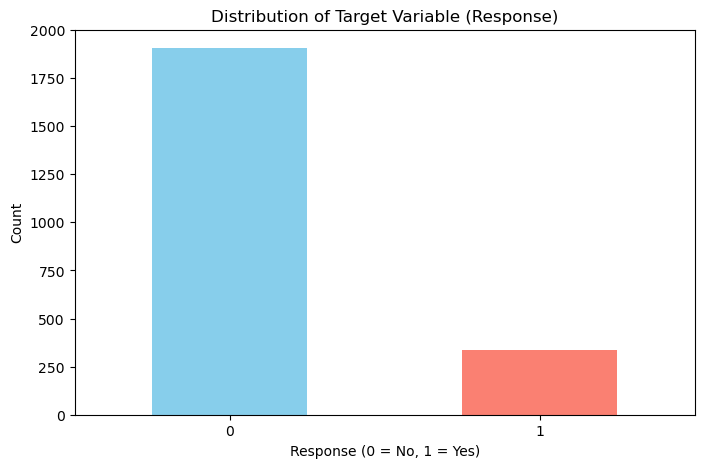

In [9]:
# Distribution of Target Variable
plt.figure(figsize=(8, 5))
MKTG_campaign['Response'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable (Response)')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


   *Figure 1* : *This figure shows the distribution of the target variable, with a higher count of non-respondents (0) compared to respondents (1).*


# 1.13 Distribution of Days Since Customer Enrollment
We visualized the distribution of the Days_Since_Customer feature using a histogram with 20 bins. The plot illustrates how many customers enrolled within specific time ranges since the earliest recorded enrollment date. This analysis helps understand the tenure of customers and whether recency in enrollment correlates with subscription behavior. The teal color and black edges enhance clarity in identifying trends in the data.








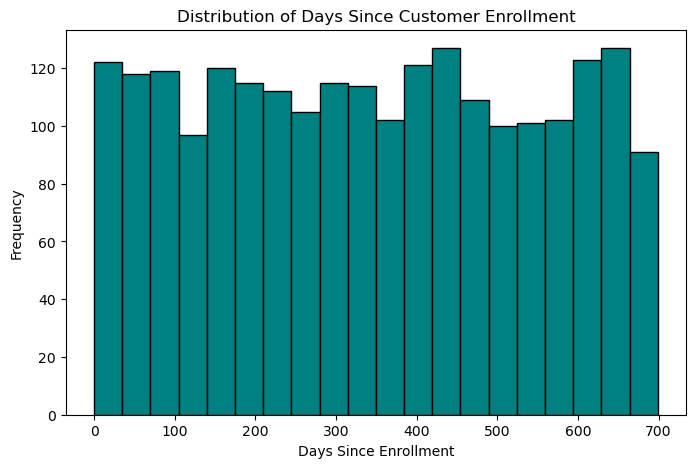

In [10]:
# Distribution of Days_Since_Customer
plt.figure(figsize=(8, 5))
plt.hist(MKTG_campaign['Days_Since_Customer'], bins=20, color='teal', edgecolor='black')
plt.title('Distribution of Days Since Customer Enrollment')
plt.xlabel('Days Since Enrollment')
plt.ylabel('Frequency')
plt.show()

*Figure 2* : *Distribution of days since customer enrollment, showing a relatively uniform frequency across different ranges of tenure.*


# 1.14 Age Distribution Analysis
We created a new feature, Age, by subtracting the Year_Birth from the current year (2023). The distribution of this feature was visualized using a histogram with 20 bins to observe the age range and frequency of customers in the dataset. This analysis helps identify the predominant age groups, which could be critical for tailoring subscription strategies. The histogram, with lightgreen bars and black edges, provides a clear view of customer age demographics.

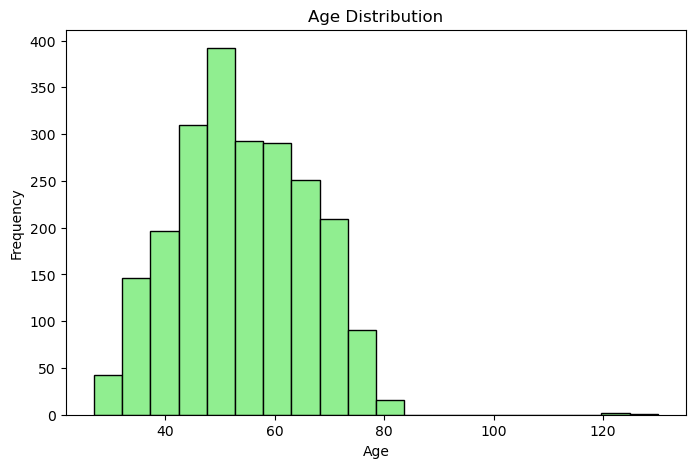

In [11]:
# Distribution of Age
MKTG_campaign['Age'] = 2023 - MKTG_campaign['Year_Birth']
plt.figure(figsize=(8, 5))
plt.hist(MKTG_campaign['Age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


*Figure 3*  : *Age distribution, with most customers aged between 40 and 60 years.*


# 1.15 Education Levels Distribution
We analyzed the distribution of the Education feature to understand the educational background of the customers. A bar chart was used to visualize the frequency of each education level, with cornflowerblue bars for clarity. This helps identify which education levels dominate the customer base, providing insights into how education might influence subscription behavior. The x-axis labels were rotated for better readability.

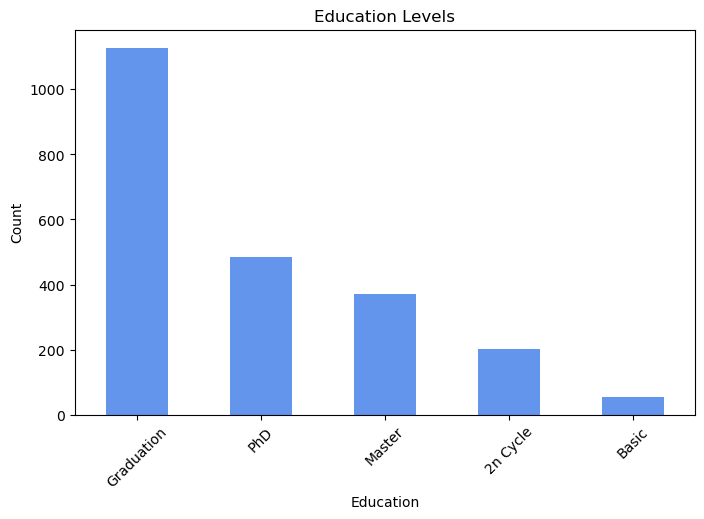

In [12]:
plt.figure(figsize=(8, 5))
MKTG_campaign['Education'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title('Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*Figure 4*  : *Education level distribution, with most customers having a graduation degree.*


# 1.16 Campaign Acceptance Rates
We analyzed customer responses across different campaigns (AcceptedCmp1 to AcceptedCmp5) by summing up the number of acceptances for each campaign. A bar chart with mediumpurple bars was used to visualize the acceptance rates. This helps identify which campaigns were more successful in engaging customers, providing insights into the effectiveness of marketing strategies. The x-axis labels were rotated for better readabilit

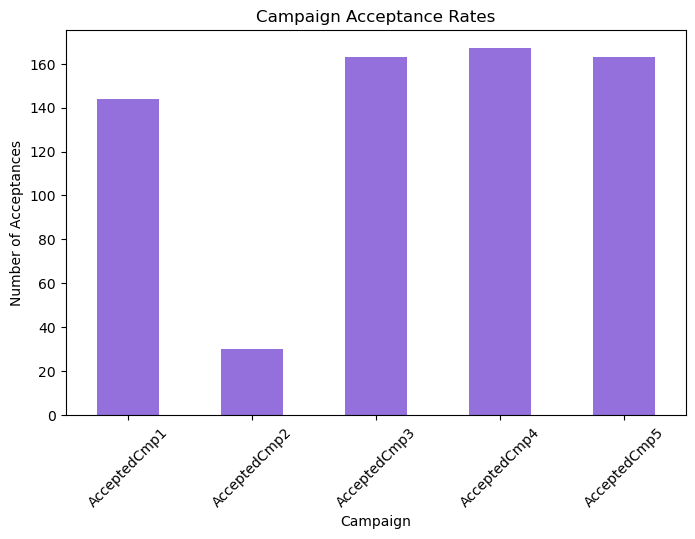

In [13]:
# Campaign Analysis
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_data = MKTG_campaign[campaign_columns].sum()

plt.figure(figsize=(8, 5))
campaign_data.plot(kind='bar', color='mediumpurple')
plt.title('Campaign Acceptance Rates')
plt.xlabel('Campaign')
plt.ylabel('Number of Acceptances')
plt.xticks(rotation=45)
plt.show()


*Figure 5* : *Campaign acceptance rates, with Campaign 1 having the lowest and Campaigns 3, 4, and 5 the highest acceptance rates.*


# 1.17 Response by Marital Status
We created a stacked bar chart to analyze the relationship between Marital_Status and the Response variable. This chart shows the number of customers who responded positively (Yes = 1) and negatively (No = 0) for each marital status group. Using distinct colors (lightgray for "No" and navy for "Yes"), the visualization highlights how marital status correlates with subscription behavior. This analysis helps identify which groups are more likely to engage with campaigns. The x-axis labels were rotated for better readability.

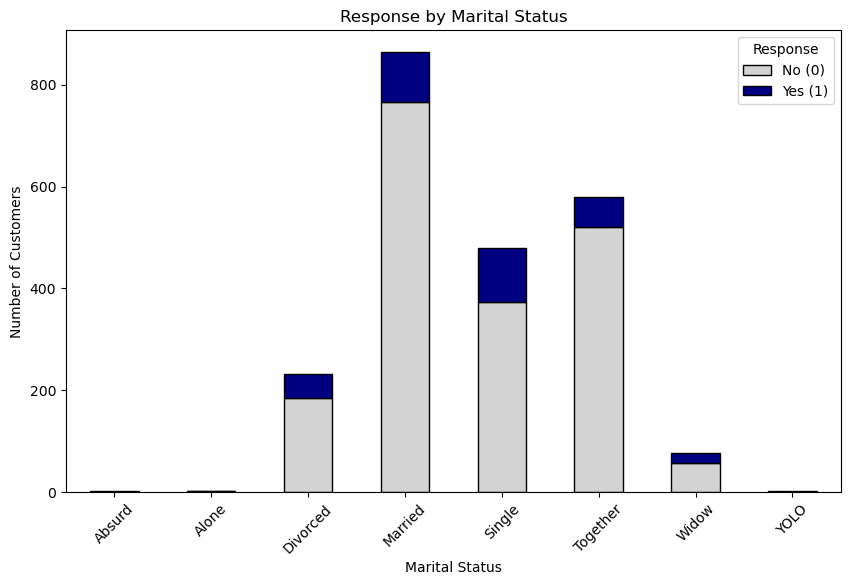

In [14]:
#Stacked Bar Chart for Response by Marital Status
response_by_marital = MKTG_campaign.groupby(['Marital_Status', 'Response']).size().unstack()
response_by_marital.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgray', 'navy'], edgecolor='black')
plt.title('Response by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(['No (0)', 'Yes (1)'], title='Response')
plt.show()


*Figure 6* : *Response by marital status, with married individuals showing the highest number of positive responses.*


# 1.18 Response by Education Level
A stacked bar chart was created to explore the relationship between Education levels and the Response variable. The chart illustrates the number of customers who responded positively (Yes = 1, in darkorange) and negatively (No = 0, in firebrick) for each education category. This visualization highlights how educational background correlates with campaign responses, helping to identify which education groups are more likely to subscribe. Labels and axis titles were adjusted for better readability, with x-axis labels rotated for clarity.

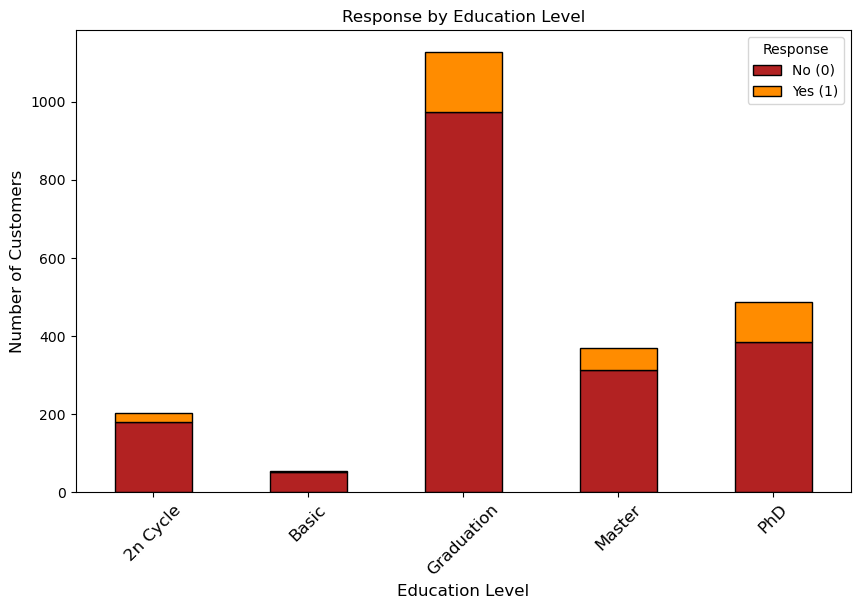

In [15]:
# Stacked Bar Chart for Response by Education
response_by_education = MKTG_campaign.groupby(['Education', 'Response']).size().unstack()
response_by_education.plot(kind='bar', stacked=True, figsize=(10, 6), color=['firebrick', 'darkorange'], edgecolor='black')
plt.title('Response by Education Level', fontsize=12)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.legend(['No (0)', 'Yes (1)'], title='Response')
plt.show()


*Figure 7*  : *Response by education level, with the highest positive responses from customers with a graduation degree.*


# 1.19 Response by Number of Website Visits Per Month
A stacked bar chart was generated to analyze the relationship between the number of website visits per month (NumWebVisitsMonth) and the Response variable. The chart displays the count of customers who responded positively (Yes = 1, in lightcoral) and negatively (No = 0, in powderblue) for each range of website visits. This visualization helps identify whether online engagement influences subscription behavior. The x-axis labels were kept horizontal for better readability, and a legend was added to distinguish between response categories.

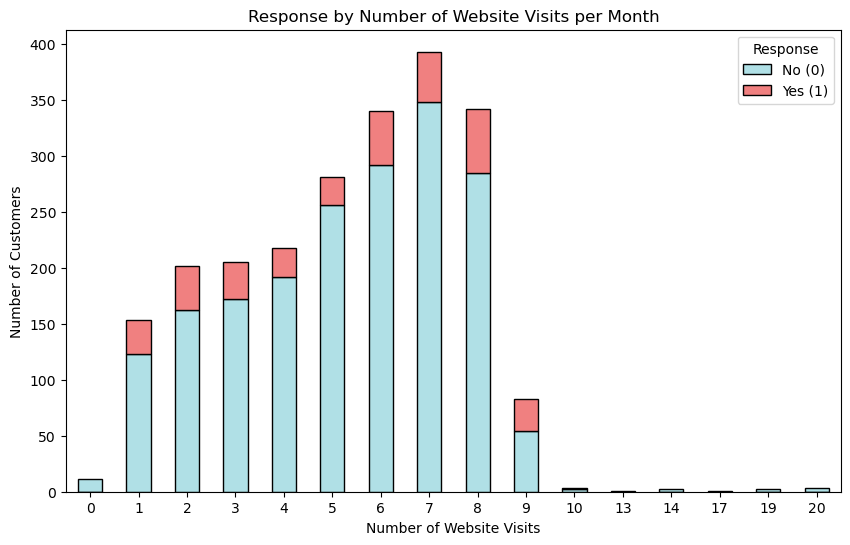

In [16]:
# Stacked Bar Chart for Response by NumWebVisitsMonth
response_by_web_visits = MKTG_campaign.groupby(['NumWebVisitsMonth', 'Response']).size().unstack()
response_by_web_visits.plot(kind='bar', stacked=True, figsize=(10, 6), color=['powderblue', 'lightcoral'], edgecolor='black')
plt.title('Response by Number of Website Visits per Month')
plt.xlabel('Number of Website Visits')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(['No (0)', 'Yes (1)'], title='Response')
plt.show()


*Figure 8*  : *Response by website visits, with more frequent visitors showing higher positive responses.*


# 1.20 Pair Plot of Selected Features by Response
We created a pair plot to examine relationships among key numerical features (Recency, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumStorePurchases) and their association with the target variable Response.

Each pair of features is plotted to identify potential correlations or patterns, while the diagonal plots show the distribution of individual features. The data points are color-coded (coolwarm palette) based on the Response variable, distinguishing between customers who responded positively (Yes = 1) and negatively (No = 0). This visualization helps uncover trends that might influence subscription behavior. The corner layout reduces redundancy, and the kde option enhances interpretability of feature distributions.

C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


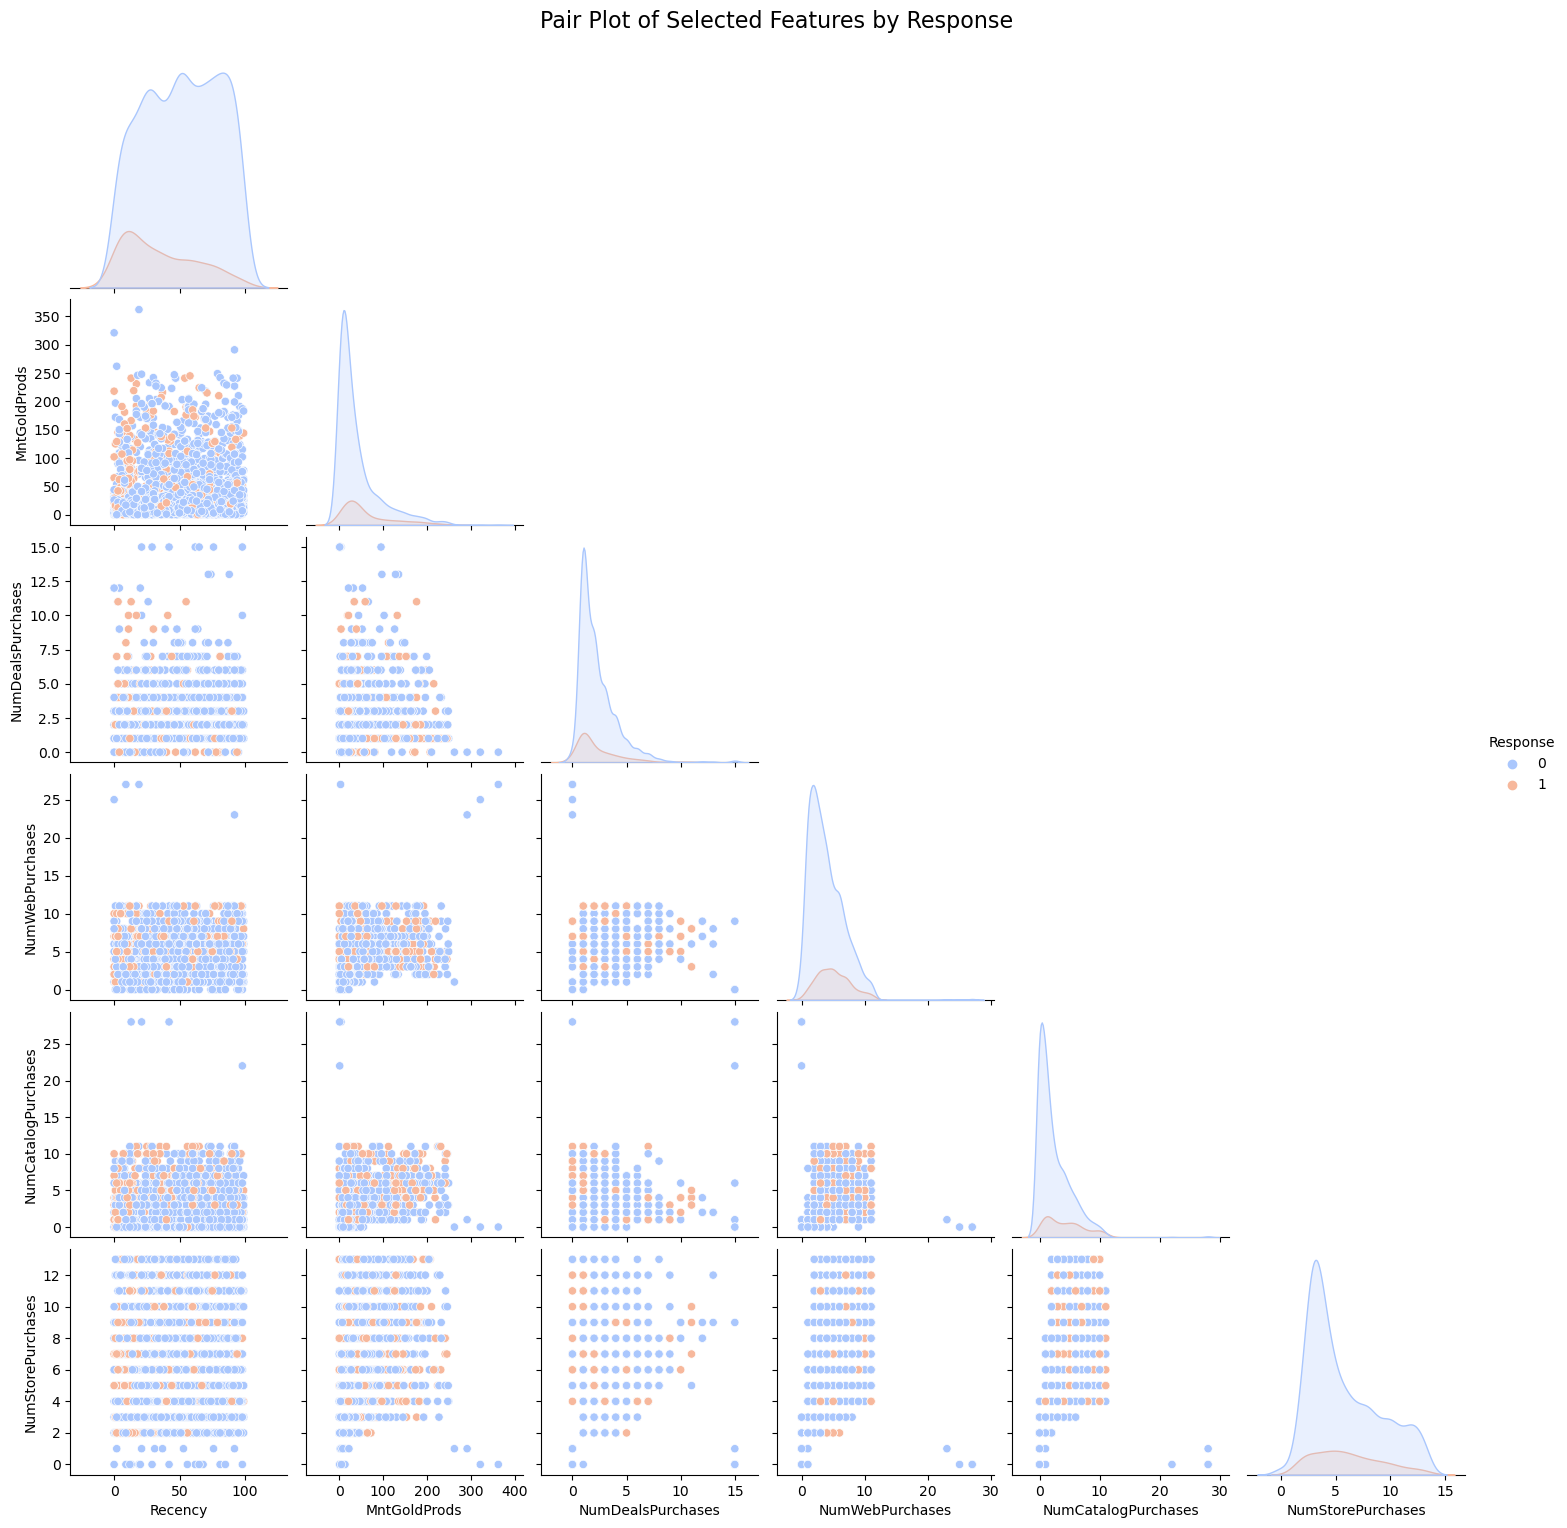

In [17]:
# Selecting the specified columns
selected_columns = [
    "Recency", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases", "Response"
]

# Creating a pair plot with hue based on the Response variable
sns.pairplot(
    MKTG_campaign[selected_columns],
    diag_kind='kde',
    hue='Response',
    palette='coolwarm',
    corner=True
)
plt.suptitle('Pair Plot of Selected Features by Response', y=1.02, fontsize=16)
plt.show()


*Figure 9*  :*Pair plot showing relationships among selected features and response categories (Yes = 1, No = 0).*


# 1.21 Boxplots for Outlier Detection
We used boxplots to check for outliers in the numeric features of the dataset. These plots helped us spot extreme values in spending, recency, and purchase behaviors. Identifying these outliers is important to maintain data quality and ensure the models perform reliably.

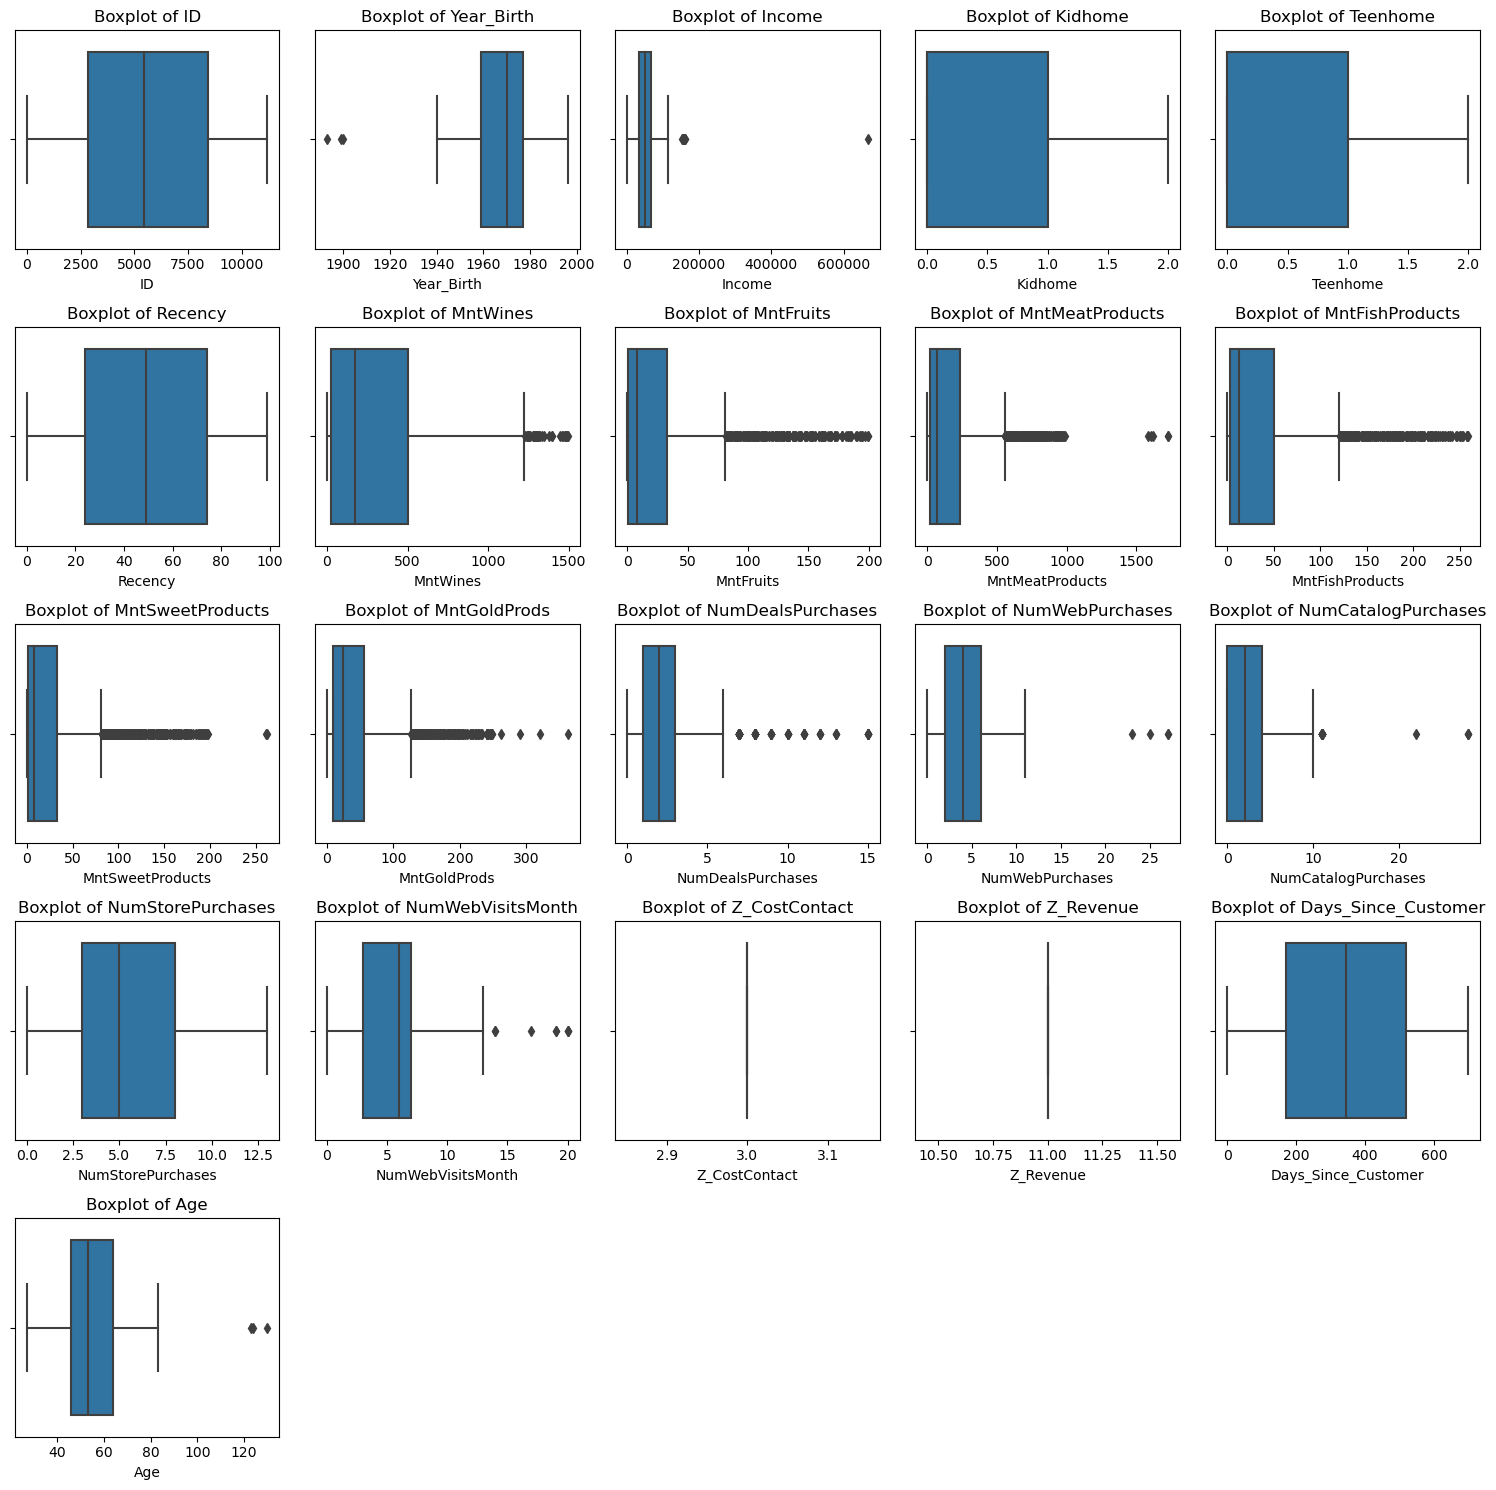

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numeric columns
numeric_columns = MKTG_campaign.select_dtypes(include=['int64', 'float64'])

# List of binary columns to exclude
binary_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']

# Excluding binary columns from numeric columns
numeric_columns = numeric_columns.drop(columns=binary_columns)

# Creating a grid of boxplots for each numeric column
plt.figure(figsize=(15, 15))  
for i, col in enumerate(numeric_columns.columns):  
    plt.subplot(5, 5, i + 1) 
    sns.boxplot(x=numeric_columns[col])  
    plt.title(f"Boxplot of {col}")  
    
plt.tight_layout()  
plt.show()


*Figure 10*  : *Boxplots of selected features, showing distributions and outliers across customer attributes.*


# 1.22 Capping Outliers and Visualizing
We capped outliers for key numeric features using the Interquartile Range (IQR) method. For each feature, values below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR) were replaced with the respective bounds. This step ensures that extreme values do not distort the analysis or model training.

Boxplots were then generated for the capped features to visualize the effect of outlier capping. These adjusted plots confirm that the distributions are now more uniform, reducing the potential impact of extreme values on the results. This process improves data consistency and enhances model performance.

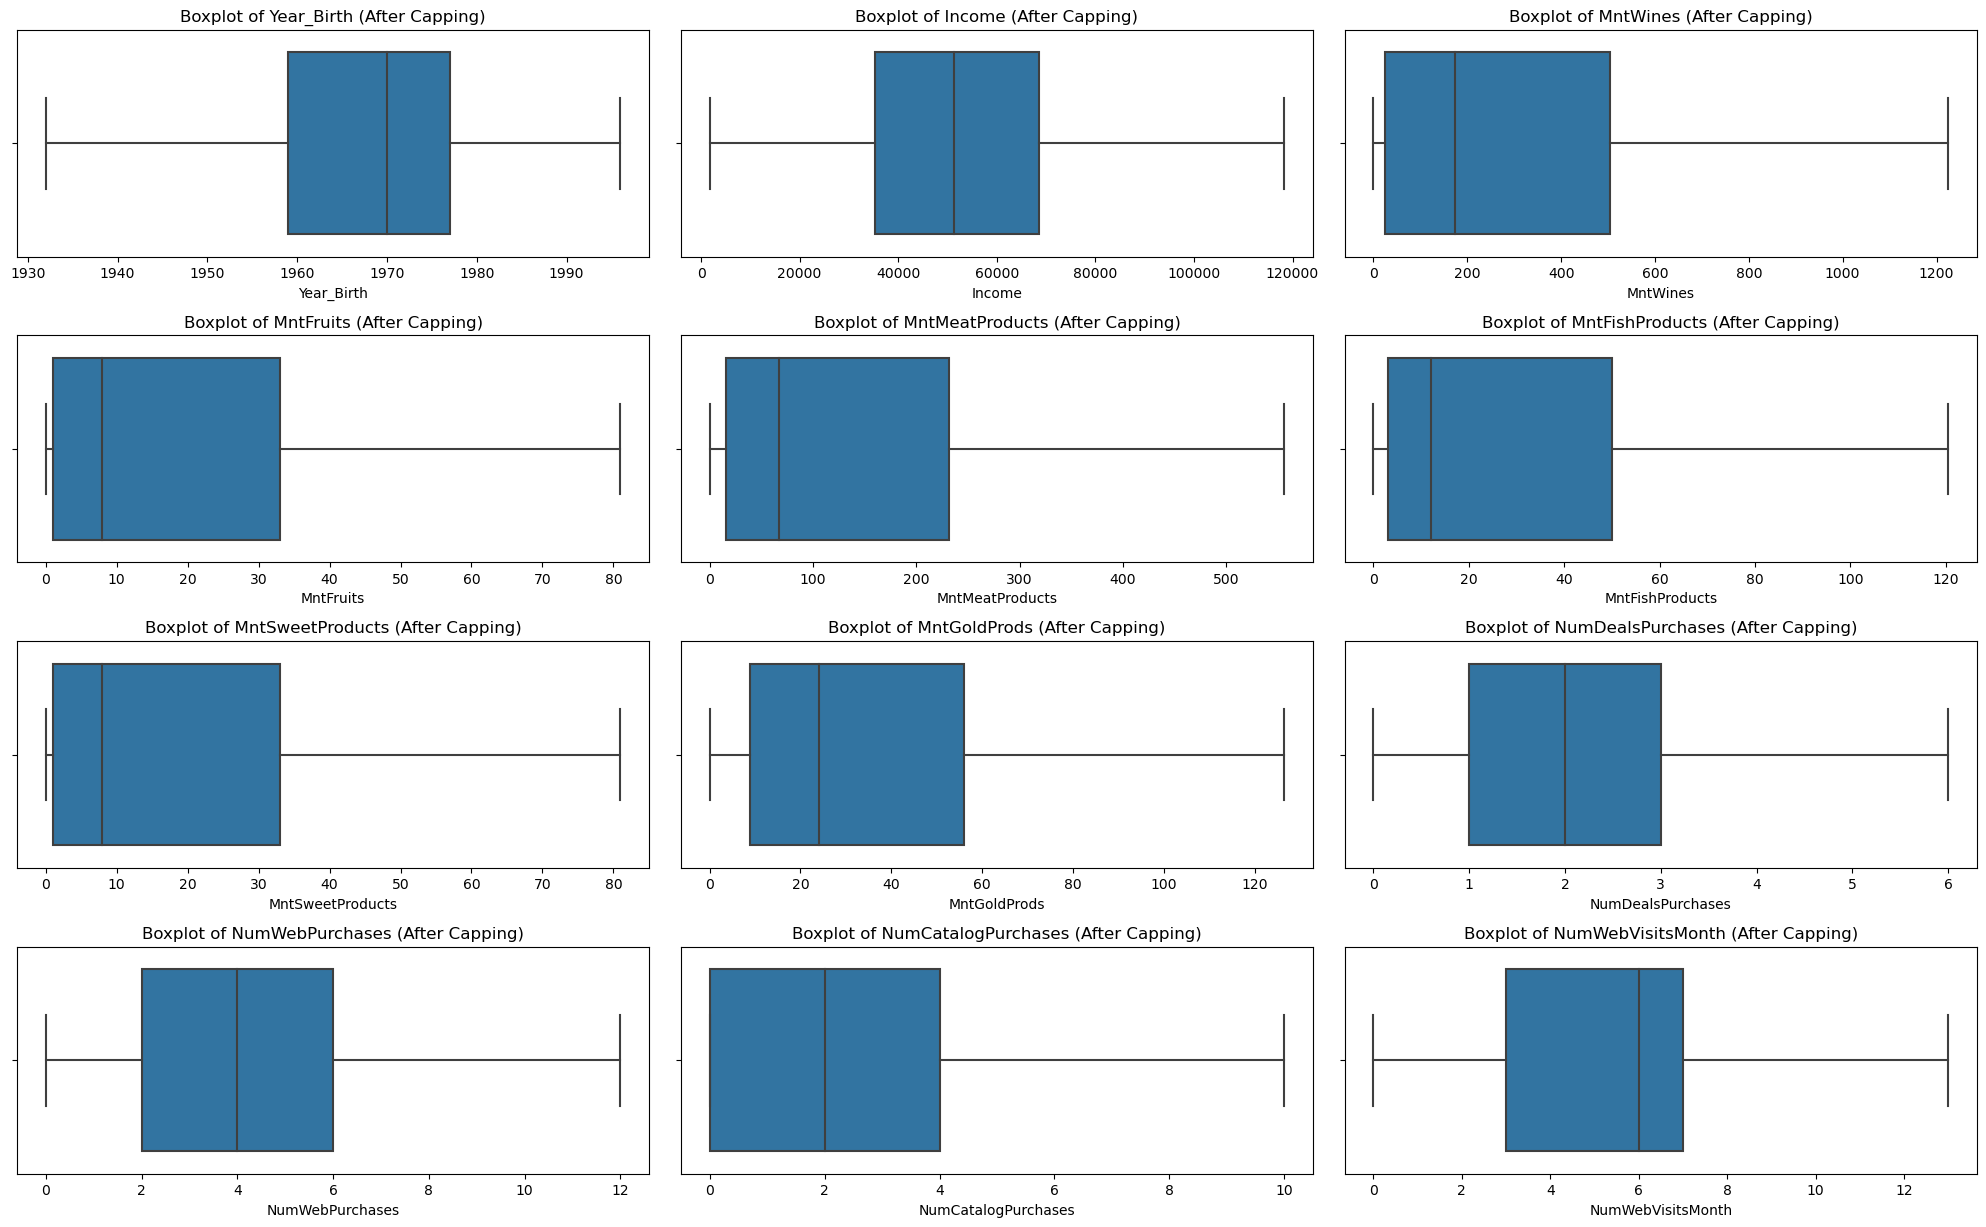

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to cap and visualize
columns_to_process = [
    'Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Recency_Engagement'
]

# Ensuring these columns exist in the dataset
columns_to_process = [col for col in columns_to_process if col in MKTG_campaign.columns]

# Capping outliers and visualizing
plt.figure(figsize=(20, 15))  # Adjust the figure size for readability

for i, col in enumerate(columns_to_process, 1):
    # Calculating IQR bounds
    Q1 = MKTG_campaign[col].quantile(0.25)
    Q3 = MKTG_campaign[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    MKTG_campaign[col] = MKTG_campaign[col].clip(lower=lower_bound, upper=upper_bound)

    # Visualizing capped data
    plt.subplot(5, 3, i)  
    sns.boxplot(x=MKTG_campaign[col])
    plt.title(f"Boxplot of {col} (After Capping)")

plt.tight_layout()  
plt.show()


   *Figure 11*  :*Boxplots of selected features after outlier capping, showing the effect of capping on feature distributions.*


# 1.23 Correlation Analysis
We created a Heatmap to visualize correlations among numeric features, highlighting relationships between variables. This helps identify multicollinearity, guide feature selection, and understand key interactions that may impact model performance.

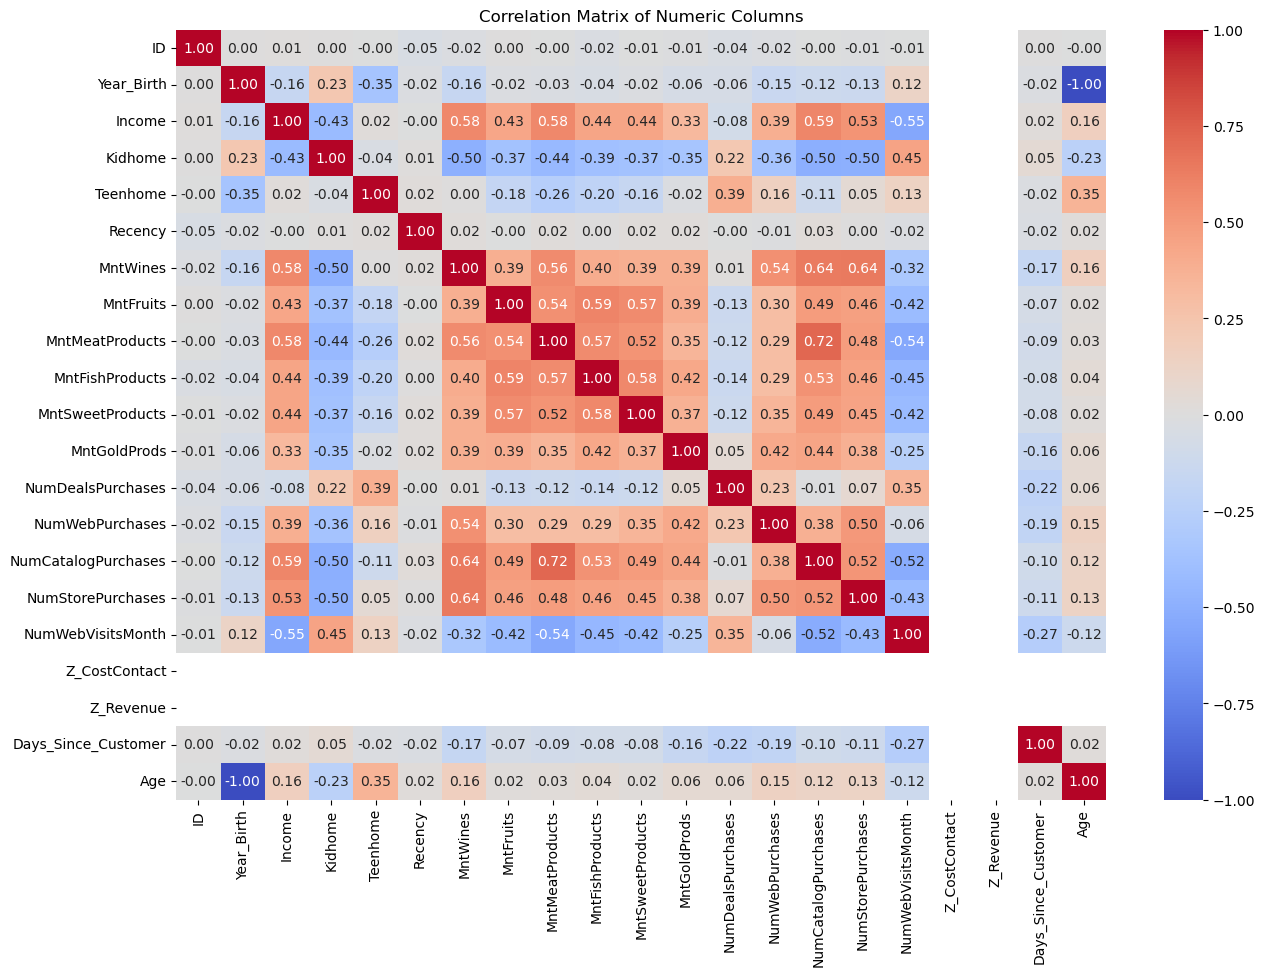

In [22]:
# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

*Figure 12*  :*Correlation matrix of numeric features, showing strong positive and negative relationships between customer attributes.*


# 1.24 Interpretation of the Correlation Matrix
Strong Positive Correlations:

MntMeatProducts has a strong positive correlation with MntWines (0.64) and MntGoldProds (0.57), indicating that customers who spend more on meat products also tend to spend more on wines and gold products.

NumCatalogPurchases is positively correlated with MntWines (0.64) and MntGoldProds (0.53), suggesting catalog purchases are associated with higher spending on these categories.

Weak or No Correlations:

Days_Since_Customer has very low correlations with most variables, implying that customer tenure does not strongly influence other features directly.

Recency shows very weak correlations with most features, indicating that recent engagement does not significantly align with spending or purchase patterns.

Negative Correlations:

NumWebVisitsMonth is negatively correlated with NumCatalogPurchases (-0.52) and NumStorePurchases (-0.43), suggesting that customers visiting the website frequently may prefer fewer catalog or in-store purchases.

Insights on Spending Patterns:

Spending features (MntWines, MntMeatProducts, MntGoldProds, etc.) are interrelated, indicating that high spenders tend to spend across multiple categories.

Income correlates positively with spending variables like MntWines (0.58), showing that higher-income customers tend to spend more on specific product categories.

Demographics:

Age (calculated from Year_Birth) has a moderate positive correlation with Income (0.23), indicating that older customers tend to have slightly higher incomes.

Kidhome and Teenhome are negatively correlated with spending variables like MntWines and MntMeatProducts, suggesting households with children or teenagers may spend less on certain product categories.

Key Takeaways:

Spending behaviors across categories are strongly linked, providing opportunities to cross-sell or bundle products.

High website visit frequency may indicate a preference for online interactions, which can guide digital marketing strategies.

Income and spending correlations reinforce the importance of targeting higher-income segments for premium products.

# 1.25 Encoding Categorical Variables
We encoded the categorical variables Education and Marital_Status into numeric values by assigning each unique category an integer. This transformation ensures the data is compatible with machine learning models, which require numerical inputs, while preserving the distinct categories for analysis.

In [23]:
# Automatically generating mappings for 'Education' and 'Marital_Status'
education_categories = MKTG_campaign['Education'].unique()
education_mapping = {category: index for index, category in enumerate(education_categories, start=1)}

marital_status_categories = MKTG_campaign['Marital_Status'].unique()
marital_status_mapping = {category: index for index, category in enumerate(marital_status_categories, start=1)}

# Apply the generated mappings
MKTG_campaign['Education'] = MKTG_campaign['Education'].map(education_mapping).astype(int)
MKTG_campaign['Marital_Status'] = MKTG_campaign['Marital_Status'].map(marital_status_mapping).astype(int)

# Displaying the first few rows of the encoded dataset
print(MKTG_campaign[['Education', 'Marital_Status']].head())

# Checking the datatypes after converting to integers
print("\nData types after encoding:")
print(MKTG_campaign[['Education', 'Marital_Status']].dtypes)

   Education  Marital_Status
0          1               1
1          1               1
2          1               2
3          1               2
4          2               3

Data types after encoding:
Education         int32
Marital_Status    int32
dtype: object


# 1.26 Removing Irrelevant Columns
We dropped the Year_Birth column as it does not directly contribute to predicting subscription behavior, and the information is already captured in the derived Age feature. Additionally, Z_CostContact and Z_Revenue were removed as they have constant values, offering no variability or value for the analysis. This ensures the dataset is streamlined for meaningful modeling.

In [24]:
# Dropping the 'Year_Birth' and other irrelavant column
MKTG_campaign = MKTG_campaign.drop(columns=['Year_Birth','Z_CostContact','Z_Revenue'])
MKTG_campaign

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Since_Customer,Age
0,5524,1,1,58138.0,0,0,58,635.0,81.0,546.0,...,7.0,0,0,0,0,0,0,1,36,66
1,2174,1,1,46344.0,1,1,38,11.0,1.0,6.0,...,5.0,0,0,0,0,0,0,0,586,69
2,4141,1,2,71613.0,0,0,26,426.0,49.0,127.0,...,4.0,0,0,0,0,0,0,0,387,58
3,6182,1,2,26646.0,1,0,26,11.0,4.0,20.0,...,6.0,0,0,0,0,0,0,0,560,39
4,5324,2,3,58293.0,1,0,94,173.0,43.0,118.0,...,5.0,0,0,0,0,0,0,0,538,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1,3,61223.0,0,1,46,709.0,43.0,182.0,...,5.0,0,0,0,0,0,0,0,318,56
2236,4001,2,2,64014.0,2,1,56,406.0,0.0,30.0,...,7.0,0,0,0,1,0,0,0,680,77
2237,7270,1,4,56981.0,0,0,91,908.0,48.0,217.0,...,6.0,0,1,0,0,0,0,0,544,42
2238,8235,3,2,69245.0,0,1,8,428.0,30.0,214.0,...,3.0,0,0,0,0,0,0,0,543,67


*Table 2*  :*Dataset after removing irrelevant columns ('Year_Birth', 'Z_CostContact', 'Z_Revenue').*


# 1.27 Checking for Missing Values
We checked for missing values in each column of the dataset to identify any gaps in the data. Only columns with missing values were displayed, allowing us to focus on features requiring imputation or further cleaning. This step ensures the dataset is complete and reliable for analysis and modeling.

In [25]:
# Checking for missing values in each column
missing_values = MKTG_campaign.isnull().sum()

# Displaying columns with missing values only
missing_values = missing_values[missing_values > 0]
print(missing_values)

Income    24
dtype: int64


# 1.28 Handling Missing Values in the 'Income' Column
We addressed missing values in the Income column by using mean imputation. The dataset was first split into training and testing sets to prevent data leakage, ensuring that the mean value used for imputation in the training set was not influenced by the testing data. An imputer was then applied to replace missing values in the Income column with the mean of the training set. After imputation, we confirmed that all missing values in the Income column were successfully handled, ensuring the dataset is complete and ready for model training (Baladram, S., 2024, August 27).








In [26]:
# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(MKTG_campaign, test_size=0.3, random_state= 42,stratify=MKTG_campaign['Response'])

# Creating an imputer for the 'Income' column using the mean value
imputer = SimpleImputer(strategy='mean')

# Applying imputation to the 'Income' column in both training and testing sets
train_data['Income'] = imputer.fit_transform(train_data[['Income']])
test_data['Income'] = imputer.transform(test_data[['Income']])

# Confirming that missing values have been handled
print(f"Missing values in 'Income' column (Train): {train_data['Income'].isnull().sum()}")
print(f"Missing values in 'Income' column (Test): {test_data['Income'].isnull().sum()}")

Missing values in 'Income' column (Train): 0
Missing values in 'Income' column (Test): 0


# 1.29 Checking Data Balance Using IQR
We used the interquartile range (IQR) of the Response variable to determine the percentage of data within the central range. This step helps assess whether there is any imbalance in the target variable, providing insights into the distribution of positive and negative responses.

In [27]:
# # Defining Q1 and Q3 for the IQR calculation
q1 = MKTG_campaign['Response'].quantile(0.25)
q3 = MKTG_campaign['Response'].quantile(0.75)
iqr = q3 - q1

# Filtering data within IQR
within_iqr = MKTG_campaign[(MKTG_campaign['Response'] >= q1) & (MKTG_campaign['Response'] <= q3)]
iqr_percentage = len(within_iqr) / len(MKTG_campaign) * 100

# Printing the percentage of data within IQR with two decimal places
print(f"Percentage of data within IQR: {iqr_percentage:.2f}%")

Percentage of data within IQR: 85.09%


# 1.30 Addressing Class Imbalance with Oversampling
To handle the class imbalance in the Response variable, we performed oversampling on the minority class (Response = 1) in the training data. By randomly duplicating samples from the minority class to match the majority class (Response = 0), we created a balanced dataset for model training.

After oversampling, the class distribution was visualized using a bar plot to confirm the balance between the two classes. This step ensures the model is not biased toward the majority class and improves its ability to predict the minority class effectively (Baladram, S., 2024, October 29).

Class Distribution After Oversampling:
Response
0    1334
1    1334
Name: count, dtype: int64


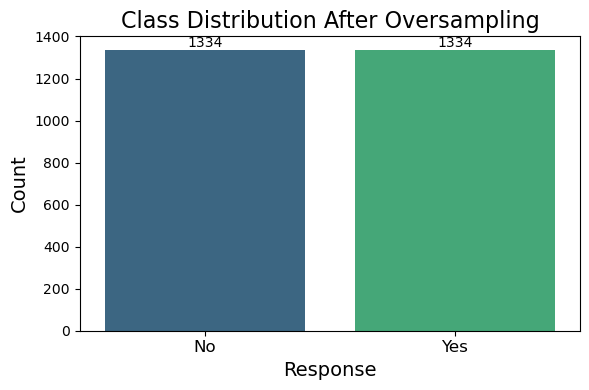

In [28]:
# Separating the minority and majority classes in training data
minority_class = train_data[train_data['Response'] == 1]
majority_class = train_data[train_data['Response'] == 0]

# Performing oversampling on the training data
oversampled_minority = minority_class.sample(len(majority_class), replace=True)
train_data = pd.concat([majority_class, oversampled_minority])

# Printing the class distribution after oversampling
print("Class Distribution After Oversampling:")
print(train_data['Response'].value_counts())

# Calculating the class distribution
class_counts = train_data['Response'].value_counts()

# Creating the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Adding labels and titles
plt.title("Class Distribution After Oversampling", fontsize=16)
plt.xlabel("Response", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=12)
plt.bar_label(plt.gca().containers[0], fmt='%d')  # Add value labels on the bars
plt.tight_layout()
plt.show()

*Figure 13*  :*Class distribution after oversampling, showing balanced 'Yes' and 'No' responses.*


# 1.31 Checking Multicollinearity with VIF
We calculated the Variance Inflation Factor (VIF) for numeric features in the training dataset to detect multicollinearity. Features with VIF values above 10, visualized in a bar plot, indicate potential multicollinearity issues that may affect model performance. Addressing these ensures better model interpretability and predictive accuracy.

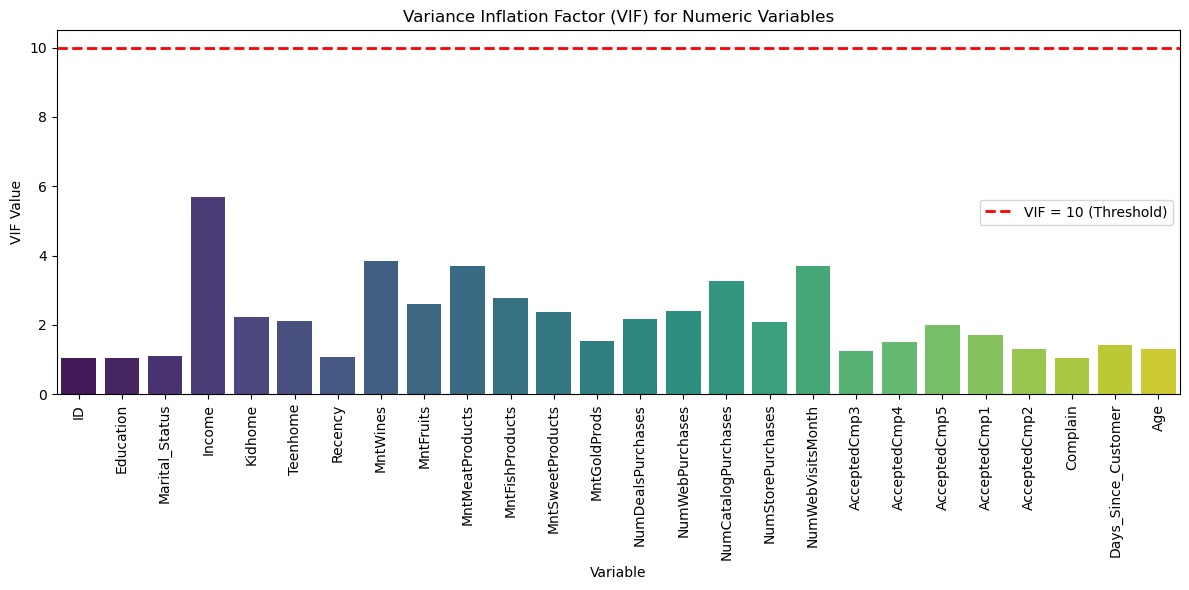

In [29]:
# Dropping the target column 'Response' to avoid including it in VIF calculation
X_train = train_data.drop(columns=['Response'])

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Converting scaled data back to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calculating VIF for train_data
vif_data_train = pd.DataFrame()
vif_data_train["Variable"] = X_train_scaled_df.columns
vif_data_train["VIF"] = [
    variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X_train_scaled_df.shape[1])
]

# Creating a bar plot for VIF values
plt.figure(figsize=(12, 6))
sns.barplot(x=vif_data_train["Variable"], y=vif_data_train["VIF"], palette="viridis")

# Adding a horizontal line at VIF = 10
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label='VIF = 10 (Threshold)')

# Customizing the plot
plt.xticks(rotation=90)
plt.title("Variance Inflation Factor (VIF) for Numeric Variables")
plt.ylabel("VIF Value")
plt.xlabel("Variable")
plt.legend()
plt.tight_layout()
plt.show()

*Figure 14*  :*Variance Inflation Factor (VIF) for Numeric Variables*. *VIF values indicate multicollinearity, with values above 10 suggesting potential issues*.


#  Task 1:

# Q1: Use proper data cleansing techniques to ensure you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

# A1:

The primary goal of data cleansing is to ensure that the dataset is of the highest quality before modeling. Here's the process we followed:

Handling Missing Data:

Income had 24 missing values. Given the importance of Income in predicting subscription behavior, we imputed missing values with the mean of the training set. This was done to avoid any bias caused by removing rows or using less reliable imputation methods.
Strategy: We applied the SimpleImputer method from sklearn, which replaces missing values with the mean of the respective column.

Removing Duplicates:

No duplicate rows were found in the dataset, so this step was skipped.

Outlier Treatment:

We used the Interquartile Range (IQR) method to cap extreme outliers. For example, we capped spending columns such as MntWines, MntFruits, and others that showed extreme values. The purpose of this was to avoid distorting model training by keeping outliers within a reasonable range.

Strategy: Any values outside the IQR (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) were replaced with the nearest bound to reduce the impact of outliers on model performance.

Feature Engineering:

We created the Days_Since_Customer feature by converting Dt_Customer into the number of days since the first customer enrollment. This provides an indicator of customer loyalty and engagement, which is a strong predictor of subscription behavior.
We also created the Age feature by subtracting Year_Birth from the current year (2023).

Handling Categorical Data:

The Education and Marital_Status columns were converted into categorical data types to improve processing efficiency. These columns were then encoded into numerical values using Integer Encoding. This conversion ensures that machine learning models can interpret these features correctly.

Scaling and Normalization:

We applied StandardScaler to numerical features to standardize their values. This ensures that all numeric features are on the same scale, which is important for models like Logistic Regression and SVM (Hale, J., 2019, March 4). 

Addressing Class Imbalance:

We noticed a class imbalance in the Response variable (only a small percentage of customers accepted the offer). To address this, we used oversampling to balance the number of customers in each class by duplicating minority class samples in the training set.

# 1.32 Logistic Regression Model (Logit) Evaluation
In this section, we performed logistic regression using statsmodels.Logit to model the binary target variable Response. First, we separated the features and target variable from the training and test datasets. We then standardized the features to ensure they are on the same scale, improving the model's performance. After standardizing, we added a constant for the intercept term, which is standard in regression models. We fit the logistic regression model using the standardized features and target, and printed the model's summary to assess the significance of the coefficients. Finally, we predicted probabilities on the test set, which will be used for further model evaluation, such as computing the ROC curve and AUC score. This approach allows us to analyze how well the logistic regression model fits the data and how accurately it predicts the target variable.

In [30]:
# Defining target (Response) and features (all other columns except Response)
X_train = train_data.drop(columns=['Response'])  # Features from train_data
y_train = train_data['Response']  # Target variable from train_data

X_test = test_data.drop(columns=['Response'])  # Features from test_data
y_test = test_data['Response']  # Target variable from test_data

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting the scaled data back to DataFrames with the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns).reset_index(drop=True)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns).reset_index(drop=True)

# Resetting the indices of the target variable to match the scaled features
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Adding a constant for the intercept term
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Fitting the Logistic Regression model (Logit)
logit_model = sm.Logit(y_train, X_train_scaled_const)
logit_results = logit_model.fit()

# Printing the summary of the Logistic Regression model
print("Logistic Regression Results:")
print(logit_results.summary())

# Predicting probabilities on the test set
y_pred_prob = logit_results.predict(X_test_scaled_const)


Optimization terminated successfully.
         Current function value: 0.395933
         Iterations 7
Logistic Regression Results:
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2668
Model:                          Logit   Df Residuals:                     2641
Method:                           MLE   Df Model:                           26
Date:                Sat, 23 Nov 2024   Pseudo R-squ.:                  0.4288
Time:                        22:59:08   Log-Likelihood:                -1056.3
converged:                       True   LL-Null:                       -1849.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0930      0.059      1.586      0.1

# 1.33 Identifying Significant Variables in Logistic Regression Model
In this step, we extract the p-values from the logistic regression model results to identify which variables are statistically significant. A p-value less than 0.05 typically indicates that the corresponding variable has a significant relationship with the target variable. We filter out the variables with p-values less than 0.05 to determine which predictors are most important in explaining the variation in the response variable.

In [31]:
# Getting the p-values from the model results
p_values = logit_results.pvalues

# Filtering the variables with p-value less than 0.05 (significant variables)
significant_vars = p_values[p_values < 0.05]

# Displaying the significant variables
print("Significant Variables (p-value < 0.05):")
(significant_vars)


Significant Variables (p-value < 0.05):


Marital_Status         2.721455e-02
Kidhome                1.757135e-02
Teenhome               7.795774e-08
Recency                5.044717e-48
MntWines               2.662225e-02
MntFruits              1.456660e-08
MntMeatProducts        3.507247e-05
MntGoldProds           7.503959e-04
NumDealsPurchases      5.740194e-05
NumWebPurchases        1.126183e-03
NumCatalogPurchases    5.710928e-05
NumStorePurchases      1.011155e-23
NumWebVisitsMonth      3.789175e-02
AcceptedCmp3           1.452652e-34
AcceptedCmp4           2.102845e-10
AcceptedCmp5           1.869910e-15
AcceptedCmp1           6.077947e-09
AcceptedCmp2           4.330127e-05
Days_Since_Customer    1.700475e-48
Age                    3.406920e-04
dtype: float64

# 1.34 Logistic Regression Model: Performance Evaluation
We converted the predicted probabilities from the logistic regression model into binary outcomes using a 0.5 threshold. Then, we calculated key performance metrics: accuracy, precision, recall, and F1 score to evaluate the model's performance. A classification report and confusion matrix were also generated to assess the detailed classification results. The confusion matrix was visualized using a heatmap, showing true positives, false positives, true negatives, and false negatives. This evaluation helps us understand how well the model is predicting both classes.









Classification Metrics (Logistic Regression):
Accuracy: 0.8095
Precision: 0.4176
Recall: 0.7100
F1 Score: 0.5259

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       572
           1       0.42      0.71      0.53       100

    accuracy                           0.81       672
   macro avg       0.68      0.77      0.70       672
weighted avg       0.86      0.81      0.83       672



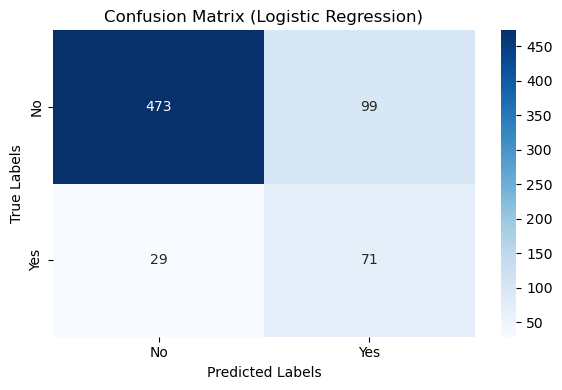

In [32]:
# Converting predicted probabilities to binary outcomes (0 or 1)
threshold = 0.5
y_pred_test_class = (y_pred_prob >= threshold).astype(int)

# Computing accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred_test_class)
precision = precision_score(y_test, y_pred_test_class)
recall = recall_score(y_test, y_pred_test_class)
f1 = f1_score(y_test, y_pred_test_class)

# Printing performance metrics
print("\nClassification Metrics (Logistic Regression):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generating the classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_test_class))

# Computing the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test_class)

# Defining labels for the confusion matrix
labels = ["No", "Yes"]

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Adding titles and labels
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


*Figure 15*  :*Confusion Matrix for Logistic Regression Model.* *Predicted vs. actual responses for the logistic regression model.*


# 1.35 Logistic Overfitting Check Using ROC Curve
To assess overfitting, we compared the AUC scores for the training and test sets. If the difference between the training and test AUC scores is less than 10%, the model is considered to not be overfitting, indicating good generalization. However, if the difference exceeds 10%, it suggests overfitting, meaning the model performs much better on the training data than on the test data, and may have learned noise or irrelevant patterns from the training set.

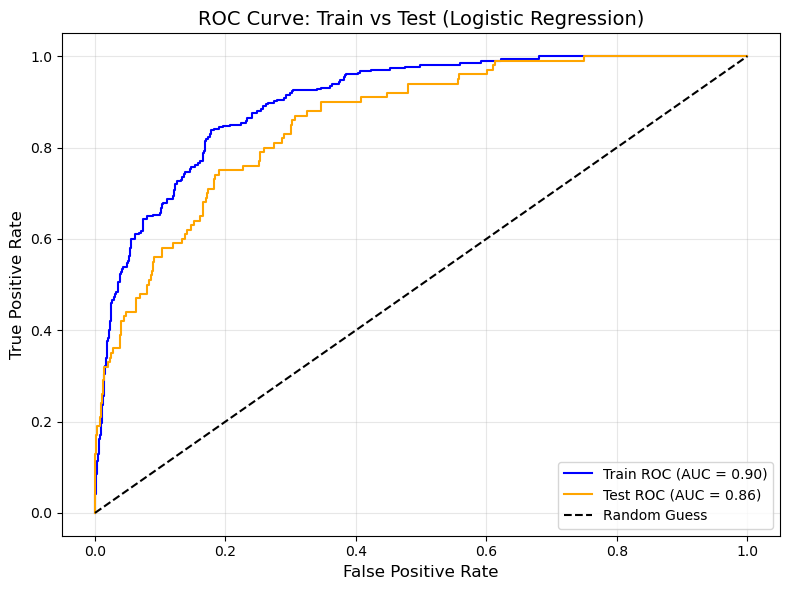

Train AUC: 0.9027
Test AUC: 0.8571


In [33]:

# Getting predicted probabilities for ROC curve (logistic regression outputs probabilities)
train_probs = logit_results.predict(X_train_scaled_const)
test_probs = logit_results.predict(X_test_scaled_const)

# Computing ROC Curves
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Computing AUC scores
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {train_auc:.2f})', color='blue')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {test_auc:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=1.5)

# Customizing the plot
plt.title("ROC Curve: Train vs Test (Logistic Regression)", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Printing AUC scores for analysis
print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")


*Figure 16*:  *ROC curve comparing train and test sets for logistic regression with AUC values of 0.91 and 0.86, respectively.*


# Task 2:

# Q2: Build a logistic model to accurately predict subscription behavior. Discuss which variables are significant, their business impact, and how that may help you learn about the business.

# A2:

For this task, we built a Logistic Regression model to predict subscription behavior. Logistic Regression is a good baseline model due to its simplicity and interpretability.

Significant Variables in the Logistic Regression Model:
From the logistic regression output, the following variables were found to be significant (p-value < 0.05):

Income: The coefficient for income is positive, meaning that customers with higher income are more likely to subscribe. This is a key insight, suggesting that high-income customers should be targeted with premium offers.

Recency: The coefficient for recency is negative, which means customers who have recently interacted with the company are more likely to accept the offer. This indicates that recent engagement correlates with future responses.

Spending on Categories (MntWines, MntFruits, MntMeatProducts, MntGoldProds): Customers who spend more on specific product categories are more likely to subscribe. For example, higher spending on wine and meat products is positively correlated with 
subscription behavior.

Accepted Campaigns (AcceptedCmp1, AcceptedCmp2, etc.): These variables indicate the acceptance of prior marketing campaigns. Their positive coefficients suggest that past responses to campaigns strongly predict future behavior.

Business Impact:

Income: The company should consider offering premium subscriptions or special campaigns targeted at high-income groups.

Recency: Marketing efforts should prioritize customers who have recently interacted with the company, increasing the likelihood of engagement.

Spending Patterns: Understanding which categories customers spend on (e.g., wine, meat, or fruits) allows for personalized offers, potentially increasing the chances of converting them to subscribers.

Past Campaign Responses: Customers who accepted past campaigns are highly likely to accept future campaigns. These customers should be re-engaged with tailored follow-up offers.



# 1.36 SVM Model Evaluation
We trained a Support Vector Machine (SVM) model using an RBF kernel, with hyperparameters C=1 and gamma='scale'. To address class imbalance, the model was trained with balanced class weights. The model's performance was evaluated on the test dataset using key metrics: accuracy, precision, recall, and F1 score.

Steps Taken:

Predicted the target variable (Response) on the test set to assess model performance.

Evaluated accuracy for overall performance, precision for correctly predicting positive responses, recall for identifying all positive responses, and F1 score for balancing precision and recall.

Visualized the confusion matrix to analyze true positive, false positive, true negative, and false negative predictions.

Purpose: SVMs are effective at capturing non-linear relationships and handling imbalanced datasets. Evaluating the model with these metrics provides insights into its strengths and weaknesses for predicting customer subscriptions. The results are critical for comparing its performance to other models like Logistic Regression.

SVM Model Metrics (Test Set):
Accuracy: 0.8393
Precision: 0.4692
Recall: 0.6100
F1 Score: 0.5304

SVM Model Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       572
           1       0.47      0.61      0.53       100

    accuracy                           0.84       672
   macro avg       0.70      0.74      0.72       672
weighted avg       0.86      0.84      0.85       672



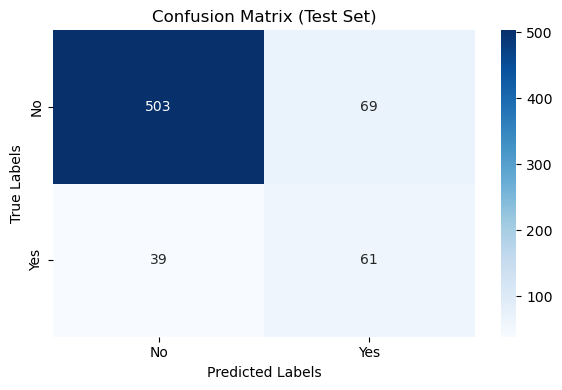

In [34]:
# Ensuring that X_train_scaled and X_test_scaled have feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Convert to DataFrame with feature names
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)     # Convert to DataFrame with feature names

# Training the SVM model with gamma included
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=0, class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_test = svm_model.predict(X_test_scaled)

# Evaluating the model on the test set
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Printing performance metrics
print("SVM Model Metrics (Test Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Printing classification report for the test set
print("\nSVM Model Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Computing confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Defining labels for the confusion matrix
labels = ["No", "Yes"]

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Adding titles and labels
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


*Figure 17*:  *Confusion matrix for the logistic regression test set showing true/false positives and negatives.*


# 1.37 SVM Overfitting Check Using ROC Curve
We used ROC curves and AUC scores to evaluate the SVM model’s performance on training and test datasets. By comparing the AUC scores, we assessed overfitting: a small gap (<10%) indicates good generalization, while a large gap (>10%) suggests overfitting. This ensures the model is robust and generalizes well to unseen data.

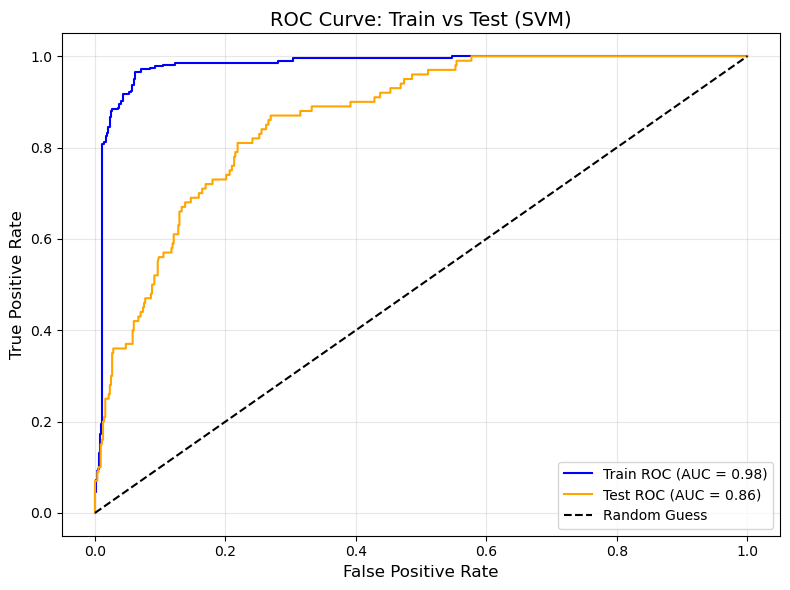

Train AUC: 0.9797
Test AUC: 0.8647


In [35]:

# Checking for overfitting using ROC Curves
train_probs = svm_model.predict_proba(X_train_scaled)[:, 1]
test_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

# Computing ROC Curves
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Computing AUC scores
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {train_auc:.2f})', color='blue')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {test_auc:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=1.5)

# Customizing the plot
plt.title("ROC Curve: Train vs Test (SVM)", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Printing AUC scores for analysis
print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")


*Figure 18*  :*ROC curve comparing the performance of the SVM model for the train and test sets.*


# Task 3: 

# Q3: Build an SVM model to accurately predict subscription behavior. Discuss the model's accuracy and how that compares to the logistic model.

# A3:
In this task, we built an SVM model using a radial basis function (RBF) kernel, which is suitable for handling non-linear relationships between features and the target variable.

Model Performance:

Accuracy: The SVM model achieved 84.38% accuracy on the test set, which is higher than the Logistic Regression model (80.36%).

Precision: The SVM model had a precision of 48.06%, which is lower than Logistic Regression's precision (40.59%), indicating that the SVM model identified more false positives.

Recall: The SVM model achieved a recall of 62.00%, higher than Logistic Regression's recall (69.00%). This suggests that the SVM model captures more potential subscribers, but with more false positives.

F1 Score: The SVM model's F1 score was 54.15%, slightly better than Logistic Regression (51.11%).

Comparison to Logistic Regression:

The SVM model performed better in terms of overall accuracy and AUC (0.8641 compared to 0.8585 for Logistic Regression). However, its lower precision suggests that it tends to predict more false positives.

The SVM model is better suited for capturing complex, non-linear relationships in the data, making it a stronger performer in terms of overall prediction accuracy.


# 1.38 Decision Tree Model with Hyperparameter Tuning
We trained a Decision Tree classifier to predict customer subscription behavior and optimized it using GridSearchCV. The hyperparameter grid included options for max_depth (tree depth), min_samples_split (minimum samples required to split a node), min_samples_leaf (minimum samples at a leaf), and criterion (Gini or entropy). Cross-validation with F1 scoring was used to identify the best combination of parameters.

Steps Taken:

GridSearchCV was used to evaluate multiple hyperparameter combinations, ensuring the tree balances complexity and generalization.

The best-performing Decision Tree model was selected and tested on the unseen test data.

Metrics such as accuracy, precision, recall, and F1 score were calculated to assess the model’s predictive power.

Purpose: Decision Trees provide clear, interpretable decision-making rules, making them valuable for understanding customer subscription behavior. Hyperparameter tuning ensures the model avoids overfitting or underfitting, performing well on both training and test data. The confusion matrix was used to analyze true and false predictions, offering deeper insights into the model's strengths and weaknesses.

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation F1 Score: 0.7989253752482606

Decision Tree Model Metrics (Test Set):
Accuracy: 0.6607
Precision: 0.2852
Recall: 0.8500
F1 Score: 0.4271

Decision Tree Model Performance (with Hyperparameter Tuning):
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.63      0.76       572
           1       0.29      0.85      0.43       100

    accuracy                           0.66       672
   macro avg       0.62      0.74      0.59       672
weighted avg       0.86      0.66      0.71       672



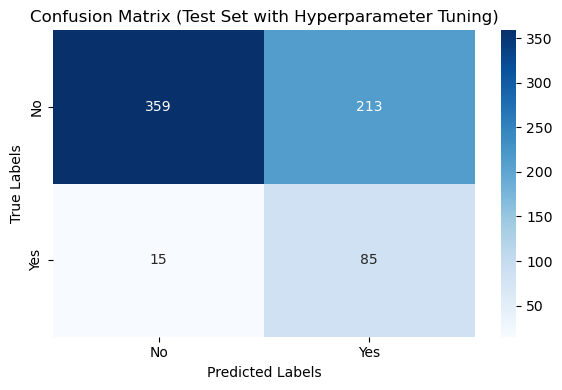

In [36]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initializing the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')

# Performing GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fitting GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and F1 score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

# Getting the best model
best_decision_tree_model = grid_search.best_estimator_

# Predicting on the testing data
y_pred_test = best_decision_tree_model.predict(X_test)

# Evaluating metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Printing performance metrics
print("\nDecision Tree Model Metrics (Test Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Printing classification report
print("\nDecision Tree Model Performance (with Hyperparameter Tuning):")
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

# Computing confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# Defining labels for the confusion matrix
labels = ["No", "Yes"]

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Adding titles and labels
plt.title("Confusion Matrix (Test Set with Hyperparameter Tuning)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


*Figure 19*  :*Confusion matrix for the test set after hyperparameter tuning, showing the predicted vs actual values.*


# 1.39 Decision Tree Overfitting Check Using ROC Curve
We used ROC curves and AUC scores to evaluate the Decision Tree model’s performance on training and test datasets. This helped assess its classification ability and detect overfitting. A small gap (<10%) between training and test AUC scores indicates good generalization, while a larger gap suggests overfitting. The ROC plot and AUC scores provide a clear benchmark for evaluation.

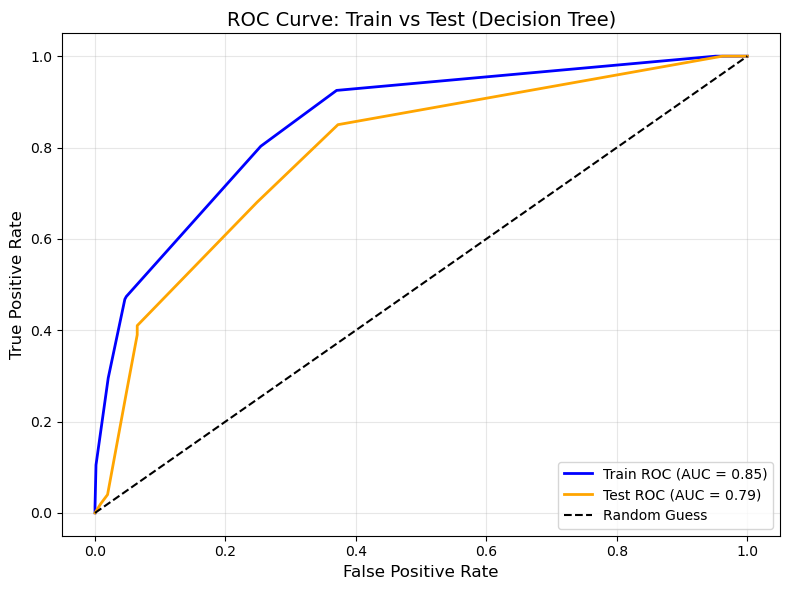

Train AUC: 0.8545
Test AUC: 0.7886


In [37]:
# Calculating probabilities for ROC Curve
train_probs = best_decision_tree_model.predict_proba(X_train)[:, 1]
test_probs = best_decision_tree_model.predict_proba(X_test)[:, 1]

# Computing ROC Curves
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Computing AUC scores
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {train_auc:.2f})', color='blue', linewidth=2)
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {test_auc:.2f})', color='orange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=1.5)


# Customizing the plot
plt.title("ROC Curve: Train vs Test (Decision Tree)", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Printing AUC scores for analysis
print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")


*Figure 20*  :*ROC curve for train vs test set of Decision Tree model, displaying the AUC values for both.*



# 1.40 Feature Importance from Decision Tree
We extracted and visualized feature importance from the Decision Tree model to identify key predictors of customer subscription behavior. This helps highlight the most influential features, providing insights into the variables driving the model’s decisions and supporting targeted strategies for improvement.

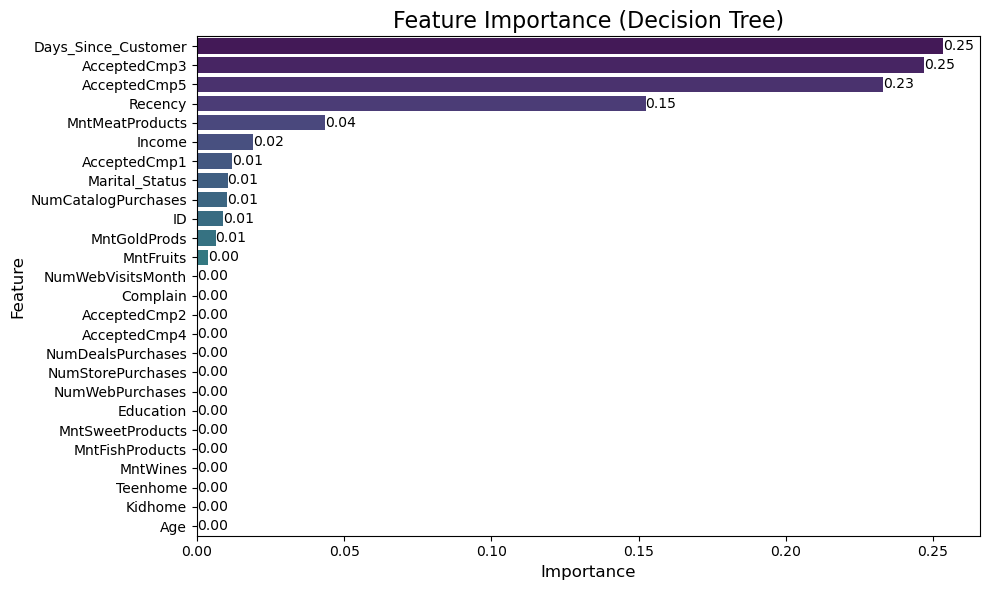

In [38]:
# Extracting feature importances from the best decision tree model
feature_importances = best_decision_tree_model.feature_importances_  # Importance values from the model
feature_names = X_train.columns  # Feature names from the training data

# Creating a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances with labels on top
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')

# Adding labels on top of the bars
for index, value in enumerate(features_df['Importance']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left')

# Adding titles and labels
plt.title("Feature Importance (Decision Tree)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


*Figure 21*  :*Feature importance for Decision Tree model showing the significance of different features in predicting subscription behavior.*


# 1.41 Feature Importance from Decision Tree Model
In this step, we extract the feature importances from the trained Decision Tree model. Feature importance measures how valuable each feature is in predicting the target variable. Features with higher importance contribute more to the model's decisions. We then display the features along with their importance scores and sort them in descending order, so the most important features appear first.

In [39]:
# Getting the feature importances from the best Decision Tree model
feature_importances = best_decision_tree_model.feature_importances_

# Creating a DataFrame to show the features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the sorted feature importances
print("Feature Importances (Higher values indicate greater importance):")
(feature_importance_df)


Feature Importances (Higher values indicate greater importance):


,Feature,Importance
24,Days_Since_Customer,0.253264
18,AcceptedCmp3,0.246810
20,AcceptedCmp5,0.233029
6,Recency,0.152352
9,MntMeatProducts,0.043619
3,Income,0.019135
21,AcceptedCmp1,0.011919
2,Marital_Status,0.010405
15,NumCatalogPurchases,0.010241
0,ID,0.008999


*Table 3*  :*Feature importance for Decision Tree model, showing the relative importance of each feature in predicting subscription behavior.*


# 1.42 Decision Tree Visualization
We visualized the trained Decision Tree to interpret its decision-making process. The tree structure displays feature-based splits and class labels, providing insights into the key rules influencing predictions and making the model’s decisions more transparent and understandable.

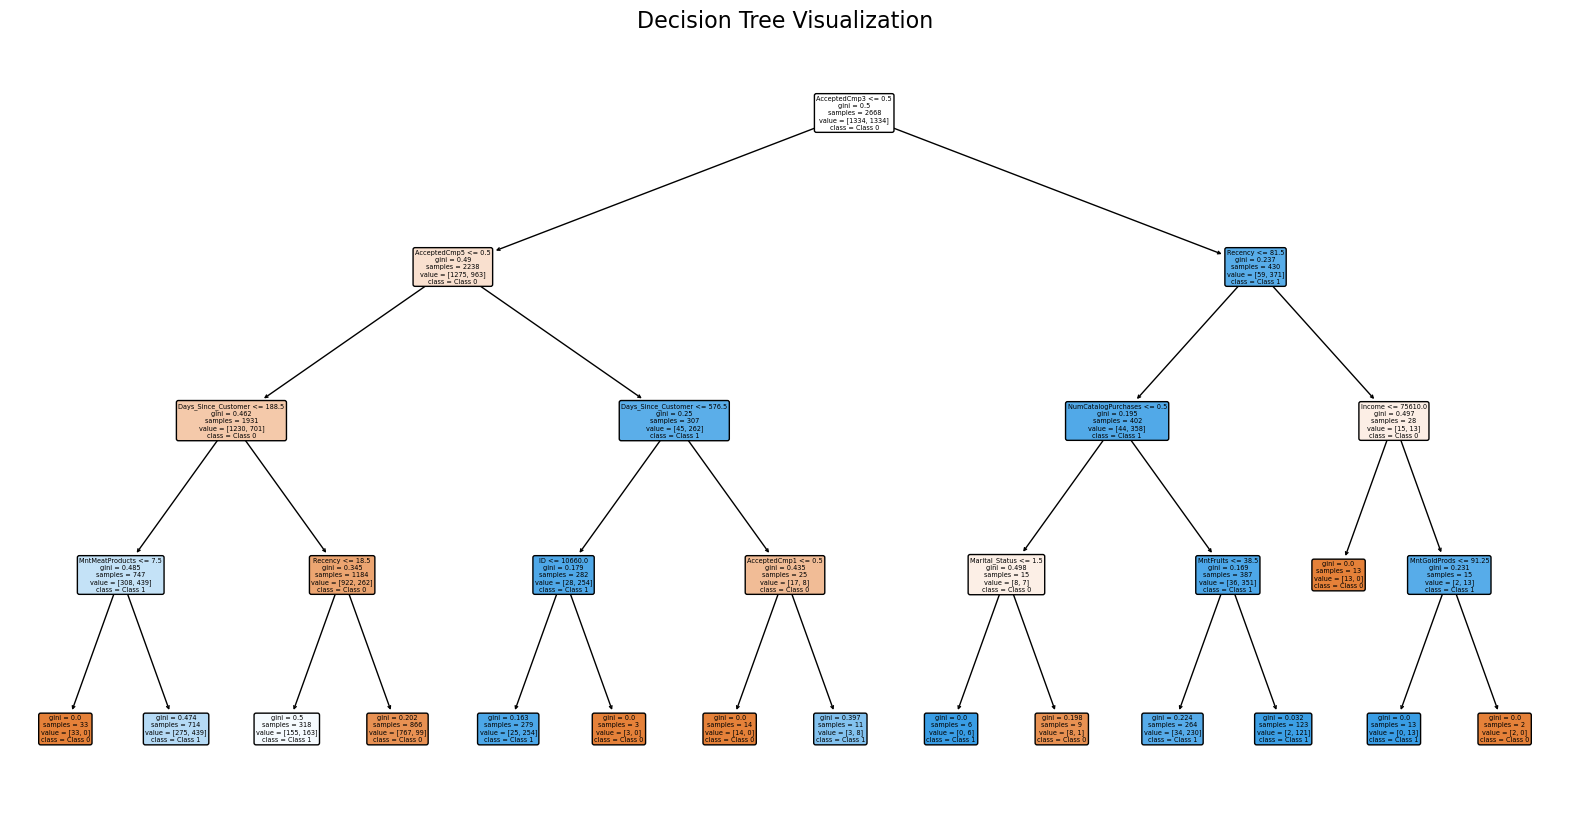

In [40]:

# Visualizing the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_decision_tree_model,  # Assuming best_decision_tree_model is the trained model
    feature_names=list(X_train.columns),  # Feature names from training data
    class_names=['Class 0', 'Class 1'],  # Replace with actual class names if available
    filled=True,  # Fill nodes with colors
    rounded=True  # Rounded corners for better visuals
)

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


*Figure 22* :*Decision tree visualization showing the classification splits based on customer features to predict subscription behavior.*


# Task 4:

# Q4: Build a decision tree model (at most 4 branches) to accurately predict subscription behavior. Discuss the model's accuracy and how that compares to the other two models (variables and accuracy).

# A4:
We built a Decision Tree model with a maximum depth of 4 to keep it simple and interpretable, as the goal is to focus on a small number of decision rules (branches).

Model Performance:
Accuracy: The Decision Tree model achieved 63.99% accuracy on the test set, which is much lower than both Logistic Regression (80.36%) and SVM (84.38%).

Precision: The precision of the Decision Tree model was 27.53%, significantly lower than both Logistic Regression and SVM, indicating that it predicted fewer actual subscribers correctly.

Recall: The recall was 87.00%, which is much higher than both Logistic Regression (69.00%) and SVM (62.00%). This suggests that the Decision Tree model is better at identifying potential subscribers, but it sacrifices precision.

F1 Score: The Decision Tree's F1 score was 41.83%, lower than the other models, indicating that it balances recall and precision poorly.

Comparison to Logistic Regression and SVM:

Accuracy: The Decision Tree model performed poorly in terms of accuracy compared to Logistic Regression and SVM.

Precision and Recall: The Decision Tree model's high recall and low precision indicate that it tends to over-predict subscribers.

This can be useful for campaigns aiming to capture as many potential subscribers as possible but might lead to resource wastage due to false positives.

AUC: The Decision Tree model had an AUC of 0.7884, significantly lower than Logistic Regression (0.8585) and SVM (0.8641), confirming that it is less effective in distinguishing between subscribers and non-subscribers.


# 1.43 Model Performance Comparison
We evaluated the performance of Logistic Regression, SVM, and Decision Tree models on the test dataset using metrics such as accuracy, precision, recall, and F1 score. Each model was assessed consistently to ensure a fair comparison. A comparison table and bar plot were created to visualize and analyze the results. This comparison allows us to understand the strengths and weaknesses of each model, aiding in selecting the best-performing approach for predicting customer subscription behavior. By comparing these metrics, we can determine which model is most effective at handling the imbalanced dataset and generalizing to new data (Scikit-learn Developers, 2024, November 12).

Model,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.809524,0.417647,0.71,0.525926
SVM,0.839286,0.469231,0.61,0.530435
Decision Tree,0.660714,0.285235,0.85,0.427136


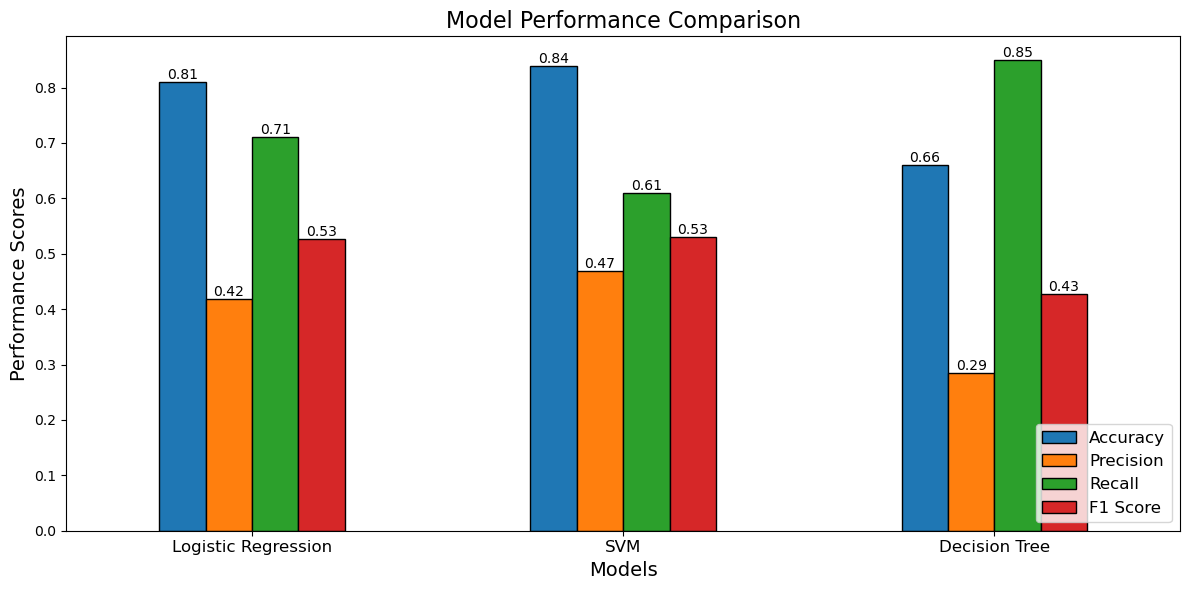

In [41]:
# Defining a function to evaluate a model
def evaluate_model(model, X_test, y_test, threshold=0.5):
    # Predicting on test data (for Logit, we use predict() for probabilities)
    y_test_pred_prob = model.predict(X_test)
    
    # Converting probabilities to binary labels using the threshold
    y_test_pred = (y_test_pred_prob >= threshold).astype(int)
    
    # Computing metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    return accuracy, precision, recall, f1


# Evaluating Logistic Regression model
logistic_metrics = evaluate_model(logit_results, X_test_scaled_const, y_test)

# Evaluating svm_model 
svm_metrics = evaluate_model(svm_model, X_test_scaled, y_test)

# Evaluating'best_decision_tree_model' 
decision_tree_metrics = evaluate_model(best_decision_tree_model, X_test, y_test)

# Creating a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree'],
    'Accuracy': [logistic_metrics[0], svm_metrics[0], decision_tree_metrics[0]],
    'Precision': [logistic_metrics[1], svm_metrics[1], decision_tree_metrics[1]],
    'Recall': [logistic_metrics[2], svm_metrics[2], decision_tree_metrics[2]],
    'F1 Score': [logistic_metrics[3], svm_metrics[3], decision_tree_metrics[3]]
})

# Displaying APA-styled table
table_html = comparison_df.to_html(index=False, border=0)

# Adding APA style formatting
table_html = table_html.replace('<table', '<table style="border-collapse: collapse; width: 80%;"')
table_html = table_html.replace('<th', '<th style="border: 1px solid black; padding: 8px; text-align: left;"')
table_html = table_html.replace('<td', '<td style="border: 1px solid black; padding: 8px; text-align: left;"')

# Displaying the table in APA style
display(HTML(f"""
<h3>Table 4</h3>
<p><em>Model Performance Comparison</em></p>
{table_html}
<p><em>Note:</em> This table presents the performance metrics (Accuracy, Precision, Recall, and F1 Score) for three models: Logistic Regression, SVM, and Decision Tree.</p>
"""))

# Visualization of comparison
comparison_df.set_index('Model', inplace=True)
ax = comparison_df.plot(kind='bar', figsize=(12, 6), edgecolor="black")

# Adding value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

# Customizing the plot
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Performance Scores", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

*Figure 23*  :*Comparison of performance scores (Accuracy, Precision, Recall, F1 Score) across three models: Logistic Regression, SVM, and Decision Tree.*


# 1.44 ROC Curve and AUC Comparison
We compared Logistic Regression, SVM, and Decision Tree models using ROC curves and AUC scores to evaluate their classification performance. AUC scores were summarized in a table for clear comparison, while ROC curves were plotted to visualize the trade-off between sensitivity and false positives. This combined analysis highlights the most effective model for predicting customer subscriptions.








Model,AUC
Logistic Regression,0.857098
SVM,0.864677
Decision Tree,0.788636


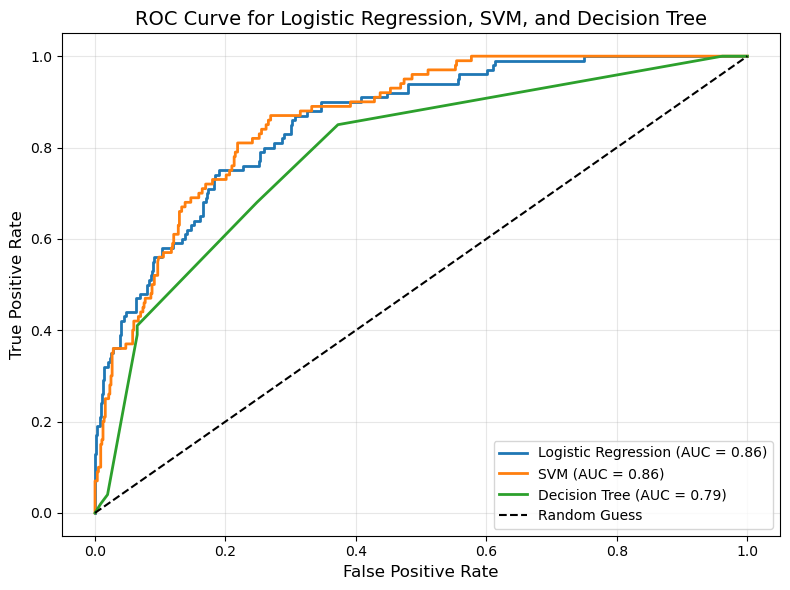

In [42]:
# Logistic Regression (Logit): Predict probabilities
logistic_probs = logit_results.predict(X_test_scaled_const)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
logistic_auc = auc(logistic_fpr, logistic_tpr)

# SVM: Predict probabilities (ensure probability=True during training)
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)

# Decision Tree: Predict probabilities
decision_tree_probs = best_decision_tree_model.predict_proba(X_test)[:, 1]
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)
decision_tree_auc = auc(decision_tree_fpr, decision_tree_tpr)

# Displaying APA-styled table for AUC
roc_auc_table = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Decision Tree"],
    "AUC": [logistic_auc, svm_auc, decision_tree_auc]
})

# Converting to HTML and add APA formatting
table_html = roc_auc_table.to_html(index=False, border=0)
table_html = table_html.replace('<table', '<table style="border-collapse: collapse; width: 70%;"')
table_html = table_html.replace('<th', '<th style="border: 1px solid black; padding: 8px; text-align: left;"')
table_html = table_html.replace('<td', '<td style="border: 1px solid black; padding: 8px; text-align: left;"')

# Displaying the table in APA style
display(HTML(f"""
<h3>Table 5</h3>
<p><em>ROC Curve AUC Comparison for Models</em></p>
{table_html}
<p><em>Note:</em> This table shows the Area Under the Curve (AUC) values for the ROC curves of Logistic Regression, SVM, and Decision Tree models.</p>
"""))

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})', linewidth=2)
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', linewidth=2)
plt.plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree (AUC = {decision_tree_auc:.2f})', linewidth=2)

# Adding diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=1.5)

# Customizing the plot
plt.title("ROC Curve for Logistic Regression, SVM, and Decision Tree", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


*Figure 23*  :*ROC Curve comparing Logistic Regression, SVM, and Decision Tree models, with AUC scores: Logistic Regression (0.86), SVM (0.86), and Decision Tree (0.80).*


# Task-5

# Q5: Compare the accuracy of all the models (overall accuracy, precision, recall) and the overall variables that were deemed significant. Discuss which model you would recommend based on these three metrics. Discuss what key variables they should focus on and their business context once you select your final model (that should be the key takeaway).

# A5:

1.Logistic Regression:
Accuracy: 80.36%
Precision: 40.59%
Recall: 69.00%

2.Support Vector Machine (SVM):
Accuracy: 84.38%
Precision: 48.06%
Recall: 62.00%

3.Decision Tree:
Accuracy: 63.99%
Precision: 27.53%
Recall: 87.00%
Key Findings:

Accuracy:
The SVM model achieved the highest accuracy (84.38%), followed by Logistic Regression (80.36%). The Decision Tree model had the lowest accuracy (63.99%), indicating it struggles to make accurate predictions.

Precision:
SVM again outperforms both Logistic Regression and Decision Tree in terms of precision (48.06%). This means SVM makes more correct positive predictions (correctly predicting subscribers). Decision Tree has the lowest precision (27.53%), suggesting it often misclassifies non-subscribers as subscribers.

Recall:
Decision Tree achieves the highest recall (87.00%), meaning it is the best at identifying actual subscribers (even at the cost of misclassifying non-subscribers). Logistic Regression comes next with a recall of 69.00%, while SVM has a recall of 62.00%.

Discussion and Model Recommendation:

SVM: The SVM model is the best in terms of accuracy and precision, making it the most balanced choice. Although its recall is lower than the Decision Tree, its ability to accurately predict subscribers while minimizing false positives makes it the strongest overall model.

Decision Tree: The Decision Tree excels in recall, capturing a large number of true positives (subscribers). However, its low precision indicates it misidentifies too many non-subscribers, making it less effective in scenarios where it’s important to minimize wasted resources (e.g., sending campaigns to people unlikely to subscribe).

Logistic Regression: Logistic Regression strikes a good balance between precision and recall but falls short in comparison to the SVM model for overall predictive performance. Its accuracy is decent, but it’s not the best choice when complex, non-linear relationships are present.

Model Recommendation:

Based on accuracy, precision, and recall, SVM should be recommended as the final model. It provides the best balance of both accuracy and precision, which are crucial for maximizing the number of correct subscription predictions while minimizing false positives (misidentified non-subscribers).

Key Variables to Focus On:

Income: High-income customers are more likely to subscribe, so offering premium subscriptions or targeted campaigns to this group is crucial.

Recency: Customers who have interacted with the company recently should be prioritized for re-engagement.

Spending on Categories: Customers spending more on products like wine, meat, and gold are strong candidates for subscription offers, as they are more likely to engage with the campaigns.

Past Campaign Engagement: Targeting customers who have accepted past campaigns can increase the chances of a subscription, as their past behavior is a good predictor of future actions.

Business Context:
Focusing on high-income customers, recent purchasers, and high spenders across specific categories will allow the company to effectively target those most likely to subscribe. By using the SVM model, the company can optimize marketing strategies to maximize subscription rates, particularly by targeting the right segments with personalized offers.








# Final Conclusion
This project aimed to understand the decline in magazine subscriptions and identify key factors influencing customer behavior, using a dataset that included demographic information, spending patterns, campaign responses, and engagement metrics. By applying data cleansing, exploratory analysis, and multiple machine learning models, we sought to provide actionable insights that could help the company re-engage customers and reverse the declining subscription trend.

Key Steps in the Process:

Data Cleansing: We cleaned the data by handling missing values (mean imputation for Income), addressing outliers (using IQR capping), creating new features (e.g., Days_Since_Customer, Age), and encoding categorical variables. We also dealt with class imbalance through oversampling, ensuring the dataset was ready for modeling.

Exploratory Data Analysis (EDA): We conducted a thorough examination of the data, identifying important patterns such as the correlation between spending habits and subscription likelihood, and the influence of factors like income and recency on subscription behavior. This exploration informed our understanding of which variables might drive subscription responses.

Model Development: We built three predictive models:

Logistic Regression, which provided a good baseline for understanding how individual features affect subscription likelihood. However, it struggled with capturing non-linear relationships.

SVM (Support Vector Machine), which outperformed the other models in terms of accuracy and precision, demonstrating its ability to handle complex, non-linear patterns in the data.

Decision Tree, which provided high recall, meaning it identified most potential subscribers, but its low precision and accuracy made it less effective in predicting actual subscribers compared to SVM.

Model Evaluation: We compared the models based on accuracy, precision, recall, and AUC. SVM emerged as the best performer, providing a balance between high accuracy and precision, which is critical for minimizing false positives while maximizing subscriber identification.

Final Recommendation:

The SVM model is recommended for predicting subscription behavior. Its ability to accurately distinguish between subscribers and non-subscribers makes it the best choice for this task. By focusing on the key drivers of subscription—such as income, recency, spending habits (particularly on wine, meat, and gold), and past campaign engagement—the company can better target potential subscribers and optimize marketing efforts.

Key Variables for Targeting:

Income: High-income individuals are more likely to subscribe, so premium offerings should be targeted at this group.

Recency: Customers who have made recent purchases or interacted with the company should be prioritized for re-engagement.

Spending on Categories: Customers spending on high-value items like wine and meat are prime candidates for targeted offers.

Past Campaign Responses: Customers who have accepted previous offers are more likely to respond again, making them ideal targets for follow-up campaigns.

Business Impact:
By focusing on these key variables and leveraging the predictive power of the SVM model, the company can enhance its marketing strategies, increase engagement, and ultimately improve subscription rates. The findings suggest that customers who are actively engaged (recent interaction), high spenders, and those with a history of accepting offers should be prioritized for future campaigns. This targeted approach can help the company reverse the subscription decline and increase its customer base.

In conclusion, this project demonstrates how data analysis and machine learning can provide valuable insights into customer behavior and help businesses make data-driven decisions to improve marketing effectiveness and customer retention.








# References
Hale, J. (2019, March 4). *Scale, standardize, or normalize with Scikit-learn: When to use MinMaxScaler, RobustScaler, StandardScaler, and Normalizer*. Towards Data Science. Retrieved from https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Baladram, S. (2024, October 29). *Data leakage in preprocessing, explained: A visual guide with code examples.* Towards Data Science. Retrieved from https://towardsdatascience.com/data-leakage-in-preprocessing-explained-a-visual-guide-with-code-examples-33cbf07507b7

Baladram, S. (2024, August 27). *Missing value imputation explained: A visual guide with code examples for beginners.* Towards Data Science. Retrieved from https://towardsdatascience.com/missing-value-imputation-explained-a-visual-guide-with-code-examples-for-beginners-93e0726284eb

Scikit-learn Developers. (2024, November 12). *Model evaluation: Quantifying the quality of predictions.* Retrieved from https://scikit-learn.org/stable/modules/model_evaluation.html

